In [1]:
import numpy as np
import pandas as pd
#import requests
import json
from datetime import datetime
import time
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import math
import requests


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
puppies['Gender']

In [8]:
puppies['Gender'].isin(['Apple','Female'])

0        False
1        False
2         True
3         True
4        False
         ...  
10488    False
10489     True
10490    False
10491     True
10492     True
Name: Gender, Length: 10493, dtype: bool

In [3]:
%store -r
#import the outside excel
puppies = pd.read_excel("puppies.xlsx", sheet_name="Sheet 1")
url = "https://data.objkt.com/v3/graphql"


In [3]:
len(puppies.token_pk)
#Metadata_2.to_excel('Metadata_2.xlsx')


10493

In [4]:
puppies.head()

,token_id,token_pk,Birthday,Bonding level,Breed,Breeding count,Eyes color,Friendliness,Fur color,Gender,...,Rarity tier,Secondary personality,Size,Status,Strength,Vitality,Rarity tier_Bronze,Rarity tier_Diamond,Rarity tier_Gold,Rarity tier_Silver
0,3,24946,15-Apr-2022,1,Golden Retriever,0,Black #5,12,Cream #5,Male,...,Diamond,Gentle,Medium male,Puppy,3,5,0,1,0,0
1,4,25265,05-Mar-2022,1,Labrador,0,Brown #5,8,Black #11,Male,...,Diamond,Charming,Small male,Puppy,6,3,0,1,0,0
2,7,25474,04-Mar-2022,1,Husky,0,Brown #3,3,Black & white #11,Female,...,Bronze,Devoted,Small female,Puppy,5,5,1,0,0,0
3,8,25907,08-Mar-2022,1,Toy Poodle,0,Grey #5,3,Apricot #6,Female,...,Bronze,Jolly,Medium female,Puppy,10,6,1,0,0,0
4,9,25798,06-Mar-2022,1,Husky,0,Green #5,3,Chocolate & white #2,Male,...,Bronze,Gentle,Medium male,Puppy,8,8,1,0,0,0


In [10]:
'['+','.join(f'"{item}"' for item in puppies['token_id'][:6]) + ']'

'["3","4","7","8","9","10"]'

In [113]:
[f'{item}' for item in puppies['token_id'][:6]]

['3', '4', '7', '8', '9', '10']

In [5]:
puppies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   token_id               10493 non-null  int64  
 1   token_pk               10493 non-null  int64  
 2   Birthday               10493 non-null  object 
 3   Bonding level          10493 non-null  int64  
 4   Breed                  10493 non-null  object 
 5   Breeding count         10493 non-null  int64  
 6   Eyes color             10493 non-null  object 
 7   Friendliness           10493 non-null  int64  
 8   Fur color              10493 non-null  object 
 9   Gender                 10493 non-null  object 
 10  Generation             10493 non-null  object 
 11  Group                  10493 non-null  object 
 12  Intelligence           10493 non-null  int64  
 13  Obedience              10493 non-null  int64  
 14  Primary personality    10493 non-null  object 
 15  Ra

#Collect the transfer history of Dogami, not trasaction history.

In [ ]:
#The current and previous holders address for tokens (discarded because the last record in holders history may not be the current holder)
""" data =pd.Series([])
for i in range(240):
    num = list(range(50*i+1,50*i+50+1))
    print(num)
    query = 'query MyQuery {\n  token(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, token_id: {_in:' + '['+ ','.join(f'"{item}"' for item in num) + ']'+'}}\n  ) {\n    display_uri\n    extra\n    flag\n    highest_offer\n    is_boolean_amount\n    last_listed\n    last_metadata_update\n    level\n    lowest_ask\n    name\n    ophash\n    supply\n    symbol\n    thumbnail_uri\n    timestamp\n    token_id\n    pk\n    holders {\n      holder_address\n    }\n  }\n}\n '
    time.sleep(0.4)
    r = requests.post(url, json={'query': query})
    print(r.status_code)
    json_data = json.loads(r.text)
    df_holder = pd.json_normalize(json_data['data'], record_path=['token', 'holders'], meta=[['token','token_id']])
    #put df into data
    data = pd.concat([data,df_holder]) """
    

In [ ]:
#The formal query loop
data = pd.Series([])
#for i in range(909,1201):
for i in range(1201):
    urlloop = f'https://api.tzkt.io/v1/tokens/transfers?token.contract=KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd&token.tokenId.lt={10*i+11}&token.tokenId.gt={10*i}&sort=timestamp&select=from.address,to.address,timestamp,id,token.tokenId'
    r= requests.get(url=urlloop)
    print(r.status_code, 10*i-10,10*i+1)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data)
    data = pd.concat([data,df])
    print(i)
    time.sleep(2)
    

In [27]:
data.head()

,0,from.address,to.address,timestamp,id,token.tokenId
0,NaN,None,tz1KmesBDcaqSy1sJkWLgBw1XNKCAnkdAhLZ,2022-06-02T23:06:44Z,2.364212e+14,11701
1,NaN,None,tz1YC3aS1NCCrxwM1n4Rudz83WnEsM1a2wpa,2022-06-02T23:06:44Z,2.364212e+14,11702
2,NaN,None,tz1aJ4s8dwp7tDxzn8wBh88oqsGPigvLzrAn,2022-06-02T23:06:44Z,2.364212e+14,11703
3,NaN,None,tz1gwm7ir8CWJ1ZjcJmP7jBv1FWe7L7iX7oz,2022-06-02T23:06:44Z,2.364212e+14,11704
4,NaN,None,tz1emUEVMSUg4TdoW7zh2GVUEjLrLpSHzQbY,2022-06-02T23:06:44Z,2.364212e+14,11705


In [12]:
transfer.head()

,from.address,to.address,timestamp,id,token.tokenId
0,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,2
1,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,1
2,None,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,2022-02-22T22:07:20Z,1.657933e+14,3
3,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22T22:11:20Z,1.657945e+14,5
4,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22T22:11:20Z,1.657945e+14,4


In [ ]:
transfer = data1

In [31]:
data1 =pd.concat([data909, data])

In [19]:
#data.drop(columns=[0,'code'],inplace=True)
data_909.drop(columns=[0], inplace=True)

In [14]:
transfer.head()

,from.address,to.address,timestamp,id,token.tokenId
0,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,2
1,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,1
2,None,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,2022-02-22T22:07:20Z,1.657933e+14,3
3,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22T22:11:20Z,1.657945e+14,5
4,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22T22:11:20Z,1.657945e+14,4


In [37]:
#transfer=pd.concat([transfer,data])
#transfer['token.tokenId'] =pd.to_numeric(transfer['token.tokenId'])
#transfer[transfer['token.tokenId']>11900]

In [15]:
#transfer.drop(columns=0, inplace=True)
transfer.describe()

,id,token.tokenId
count,5.711400e+04,57114.000000
mean,2.474346e+14,5841.978377
std,1.179000e+14,3387.324197
min,1.657915e+14,1.000000
25%,1.683066e+14,2903.000000
50%,1.990615e+14,5930.500000
75%,2.615984e+14,8568.000000
max,7.977786e+14,12000.000000


Stored 'Ptrade_final' (DataFrame)


<class 'pandas.core.frame.DataFrame'>
Index: 5064 entries, 0 to 6915
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5064 non-null   float64       
 1   price                           5064 non-null   float64       
 2   timestamp                       5064 non-null   object        
 3   token_pk                        5064 non-null   float64       
 4   recipient_address               5064 non-null   object        
 5   creator_address                 5064 non-null   object        
 6   currency_id                     5064 non-null   float64       
 7   marketplace_event_type          5064 non-null   object        
 8   token.token_id                  5064 non-null   int64         
 9   currency.current_exchange_rate  40 non-null     float64       
 10  currency.decimals               5064 non-null   float64       
 11  ts_new   

In [6]:
#%store transfer
transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57114 entries, 0 to 32
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   from.address   45104 non-null  object 
 1   to.address     57114 non-null  object 
 2   timestamp      57114 non-null  object 
 3   id             57114 non-null  float64
 4   token.tokenId  57114 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
transfer.index= range(len(transfer)) #Make the index in order

In [6]:
#Convert the timestamp
transfer['timestamp']=pd.to_datetime(transfer['timestamp'])

In [7]:
transfer[(transfer['token.tokenId']==4)]
#transfer[(transfer['token.tokenId']=='4')]

,from.address,to.address,timestamp,id,token.tokenId
4,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22 22:11:20+00:00,1.657945e+14,4
14,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,2022-02-23 01:41:00+00:00,1.658692e+14,4
41,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,2022-06-05 16:36:59+00:00,2.389305e+14,4
43,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2022-11-13 15:19:44+00:00,3.783361e+14,4
44,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,2022-11-14 11:16:14+00:00,3.791192e+14,4
45,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2023-01-18 05:59:14+00:00,4.376779e+14,4
46,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1SRrDMtQvMVGjFyMZ39zC5FDjiKtdWWPQP,2023-01-18 06:13:14+00:00,4.376855e+14,4
47,tz1SRrDMtQvMVGjFyMZ39zC5FDjiKtdWWPQP,tz1YUu7LL5mhA7sHGKFHAUdCHiC5U1AygGvU,2023-01-18 21:41:14+00:00,4.382529e+14,4
48,tz1YUu7LL5mhA7sHGKFHAUdCHiC5U1AygGvU,tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP,2023-01-18 21:43:14+00:00,4.382543e+14,4


In [8]:
#Exclude the duplicate transfer
print(Counter(transfer.duplicated()))
transfer = transfer.drop_duplicates()
transfer_after_mine = transfer[[i != None for i in transfer['from.address']]] #Exclude the None value

Counter({False: 57080, True: 34})


In [8]:
transfer[transfer['token.tokenId']==2]

,from.address,to.address,timestamp,id,token.tokenId
0,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22 22:01:20+00:00,1.657915e+14,2
15,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,2022-02-23 07:31:40+00:00,1.659701e+14,2


In [9]:
transfer['timediff_day'] =pd.Series([])
transfer['timediff_hours']=pd.Series([])
#ConverttokenID into number
transfer['token.tokenId']=pd.to_numeric(transfer['token.tokenId'])

<ipython-input-9-ba3e2907d36f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['timediff_day'] =pd.Series([])
<ipython-input-9-ba3e2907d36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['timediff_hour']=pd.Series([])
<ipython-input-9-ba3e2907d36f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [18]:
pd.to_datetime(box['timestamp']).dt.to_period('W')

<ipython-input-18-061b1a6d1217>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pd.to_datetime(box['timestamp']).dt.to_period('W')


0       2022-02-21/2022-02-27
1       2022-02-21/2022-02-27
2       2022-02-21/2022-02-27
3       2023-07-17/2023-07-23
4       2022-02-21/2022-02-27
                ...          
2092    2023-03-13/2023-03-19
2093    2022-05-30/2022-06-05
2094    2022-06-06/2022-06-12
2095    2022-05-30/2022-06-05
2096    2022-06-20/2022-06-26
Name: timestamp, Length: 2097, dtype: period[W-SUN]

In [10]:
transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57080 entries, 0 to 57113
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   from.address   45080 non-null  object             
 1   to.address     57080 non-null  object             
 2   timestamp      57080 non-null  datetime64[ns, UTC]
 3   id             57080 non-null  float64            
 4   token.tokenId  57080 non-null  int64              
 5   timediff_day   0 non-null      object             
 6   timediff_hour  0 non-null      object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 3.5+ MB


In [11]:
pd.to_timedelta('1 days 06:05:01.00003')

Timedelta('1 days 06:05:01.000030')

In [12]:
transfer.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       57104, 57105, 57106, 57107, 57108, 57109, 57110, 57111, 57112, 57113],
      dtype='int64', length=57080)

In [35]:
transfer['timestamp']= pd.to_datetime(transfer['timestamp'])

<ipython-input-35-156f4193bbe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['timestamp']= pd.to_datetime(transfer['timestamp'])


In [ ]:
#Adding the a,b as copy to reduce the computation, if using original, there will be warning for every loop.
a = transfer['timediff_day'].copy()
b= transfer['timediff_hours'].copy()
for i in range(12000):
    temp = transfer['timestamp'][transfer['token.tokenId']==i+1].diff().astype('timedelta64[s]')
    a[temp.index] = temp #The index is the one in 'transfer' table, after subset the index is not changed.
    temp = transfer['timestamp'][transfer['token.tokenId']==i+1].diff()
    b[temp.index] = temp
    #a = pd.concat([a,temp])

#Convert the     
transfer['timediff_day']=b.astype('timedelta64[s]')
transfer['timediff_second']=a.astype('timedelta64[s]')


In [37]:
transfer['timestamp'][transfer['token.tokenId']==11].diff()

49                 NaT
61     0 days 00:16:00
64     0 days 00:18:00
98   288 days 17:14:39
Name: timestamp, dtype: timedelta64[ns]

In [16]:
transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57080 entries, 0 to 57113
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   from.address     45080 non-null  object             
 1   to.address       57080 non-null  object             
 2   timestamp        57080 non-null  datetime64[ns, UTC]
 3   id               57080 non-null  float64            
 4   token.tokenId    57080 non-null  int64              
 5   timediff_day     45080 non-null  timedelta64[s]     
 6   timediff_hour    0 non-null      object             
 7   timediff_second  45080 non-null  timedelta64[s]     
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3), timedelta64[s](2)
memory usage: 5.9+ MB


In [17]:
#transfer['timediff_second']= transfer['timediff_second'].dt.total_seconds()

In [18]:
transfer['timediff_second']

0                     NaT
1                     NaT
2                     NaT
3                     NaT
4                     NaT
               ...       
57109     2 days 19:26:00
57110    60 days 00:07:30
57111    17 days 02:53:45
57112   230 days 14:15:00
57113     4 days 22:19:45
Name: timediff_second, Length: 57080, dtype: timedelta64[s]

In [38]:
#Second function
#Indeed it can be calculated from the above
def seconds_hours(x):
    if np.isnan(x) ==True:
        return x
    else:
        return math.ceil(x/360)/10
    
transfer['timediff_hours']= transfer['timediff_second'].dt.total_seconds().apply(lambda x:  seconds_hours(x))

<ipython-input-38-0aead7d19edc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['timediff_hour']= transfer['timediff_second'].dt.total_seconds().apply(lambda x:  seconds_hours(x))


<ipython-input-53-c745534a0b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['timediff_hours']= transfer['timediff_second'].dt.total_seconds().apply(lambda x:  seconds_hours(x))


In [39]:
transfer

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second
0,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22 22:01:20+00:00,1.657915e+14,2,NaT,NaN,NaT
1,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22 22:01:20+00:00,1.657915e+14,1,NaT,NaN,NaT
2,None,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,2022-02-22 22:07:20+00:00,1.657933e+14,3,NaT,NaN,NaT
3,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22 22:11:20+00:00,1.657945e+14,5,NaT,NaN,NaT
4,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22 22:11:20+00:00,1.657945e+14,4,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...
57109,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1ZFBbBCD8cAEE2nKpinT8eSmWCVNEaxrfF,2022-09-08 12:06:29+00:00,3.217187e+14,11996,2 days 19:26:00,67.5,2 days 19:26:00
57110,tz1ZFBbBCD8cAEE2nKpinT8eSmWCVNEaxrfF,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2022-11-07 12:13:59+00:00,3.727853e+14,11996,60 days 00:07:30,1440.2,60 days 00:07:30
57111,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1NLqM94fKksS7YPYp41zbPtwKaRyh6qD1W,2022-11-24 15:07:44+00:00,3.884420e+14,11996,17 days 02:53:45,410.9,17 days 02:53:45
57112,tz1XUtVSyA3Yyf9ojvm37kNDQy2oTDGRHnsb,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2023-01-30 22:33:29+00:00,4.492093e+14,12000,230 days 14:15:00,5534.3,230 days 14:15:00


In [29]:
transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57080 entries, 0 to 57113
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   from.address     45080 non-null  object             
 1   to.address       57080 non-null  object             
 2   timestamp        57080 non-null  datetime64[ns, UTC]
 3   id               57080 non-null  float64            
 4   token.tokenId    57080 non-null  int64              
 5   timediff_day     45080 non-null  timedelta64[s]     
 6   timediff_hour    0 non-null      object             
 7   timediff_second  45080 non-null  float64            
 8   timediff_hours   45080 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3), timedelta64[s](1)
memory usage: 6.4+ MB


In [30]:
transfer.drop(columns=['timediff_hours'], inplace=True)

<ipython-input-30-5dcb5e3c0cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer.drop(columns=['timediff_hours'], inplace=True)


In [23]:
transfer['timestamp'][transfer['token.tokenId']==10]#.diff().astype('timedelta64[s]')

9    2022-02-22 22:15:20+00:00
12   2022-02-22 23:01:20+00:00
22   2022-02-25 13:34:24+00:00
31   2022-03-08 12:10:14+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [24]:
#To see what happening in new label, use token #100 as an example
transfer[transfer['token.tokenId']==100]

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
499,None,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,2022-02-22 22:34:20+00:00,1.658020e+14,100,NaT,NaN,NaT,NaN
517,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,tz1csAGXjPyid1jahsfb1Mo8BSECyor3cjxv,2022-03-11 03:50:14+00:00,1.730388e+14,100,16 days 05:15:54,389.3,16 days 05:15:54,389.3
528,tz1csAGXjPyid1jahsfb1Mo8BSECyor3cjxv,tz1ghJLuav1AQBZLaZCf77yRGtkZgtg2rCeo,2022-05-24 23:46:44+00:00,2.283758e+14,100,74 days 19:56:30,1796.0,74 days 19:56:30,1796.0
531,tz1ghJLuav1AQBZLaZCf77yRGtkZgtg2rCeo,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,2022-10-09 23:30:59+00:00,3.485358e+14,100,137 days 23:44:15,3311.8,137 days 23:44:15,3311.8
532,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,tz2GxrHvABCj9qMBqVoMkbEXggQ6TwUV4B6m,2022-11-29 03:12:44+00:00,3.922808e+14,100,50 days 03:41:45,1203.7,50 days 03:41:45,1203.7
533,tz2GxrHvABCj9qMBqVoMkbEXggQ6TwUV4B6m,tz2Me2mSgJdmNJjRR8LFHWfNqxPAipuez2ng,2022-11-30 13:50:29+00:00,3.935610e+14,100,1 days 10:37:45,34.7,1 days 10:37:45,34.7
535,tz2Me2mSgJdmNJjRR8LFHWfNqxPAipuez2ng,tz2X2hgWkUDiARfhNggK6Ej2bG99u82rvkXY,2023-02-22 03:37:59+00:00,4.693418e+14,100,83 days 13:47:30,2005.8,83 days 13:47:30,2005.8
536,tz2X2hgWkUDiARfhNggK6Ej2bG99u82rvkXY,tz2Me2mSgJdmNJjRR8LFHWfNqxPAipuez2ng,2023-02-22 03:42:59+00:00,4.693444e+14,100,0 days 00:05:00,0.1,0 days 00:05:00,0.1
537,tz2Me2mSgJdmNJjRR8LFHWfNqxPAipuez2ng,tz1a7UKxGSDMMDeNvHXPYmFh4Tm4yBZFSFLr,2023-03-01 17:23:29+00:00,4.758670e+14,100,7 days 13:40:30,181.7,7 days 13:40:30,181.7


In [33]:
print(Counter(a).most_common(10))
Counter(b).most_common(10)

[(NaT, 12000), (Timedelta('0 days 00:02:00'), 872), (Timedelta('0 days 00:01:00'), 797), (Timedelta('0 days 00:02:30'), 771), (Timedelta('0 days 00:01:30'), 734), (Timedelta('0 days 00:03:00'), 574), (Timedelta('0 days 00:03:30'), 468), (Timedelta('0 days 00:04:00'), 401), (Timedelta('0 days 00:04:30'), 290), (Timedelta('0 days 00:05:00'), 241)]


[(NaT, 12000),
 (Timedelta('0 days 00:02:00'), 872),
 (Timedelta('0 days 00:01:00'), 797),
 (Timedelta('0 days 00:02:30'), 771),
 (Timedelta('0 days 00:01:30'), 734),
 (Timedelta('0 days 00:03:00'), 574),
 (Timedelta('0 days 00:03:30'), 468),
 (Timedelta('0 days 00:04:00'), 401),
 (Timedelta('0 days 00:04:30'), 290),
 (Timedelta('0 days 00:05:00'), 241)]

In [25]:
Counter(transfer['timediff_day']).most_common(10)

[(NaT, 12000),
 (Timedelta('0 days 00:02:00'), 872),
 (Timedelta('0 days 00:01:00'), 797),
 (Timedelta('0 days 00:02:30'), 771),
 (Timedelta('0 days 00:01:30'), 734),
 (Timedelta('0 days 00:03:00'), 574),
 (Timedelta('0 days 00:03:30'), 468),
 (Timedelta('0 days 00:04:00'), 401),
 (Timedelta('0 days 00:04:30'), 290),
 (Timedelta('0 days 00:05:00'), 241)]

In [26]:
transfer[transfer['token.tokenId']==273]

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
1331,None,tz1ac2jRGjVLmhnac6KpGch2rmbR6gjk7DKY,2022-02-22 22:38:20+00:00,1.658035e+14,273,NaT,NaN,NaT,NaN
1389,tz1ac2jRGjVLmhnac6KpGch2rmbR6gjk7DKY,tz1eraTmjeb1BK5XECtPHBE8AsW6gZESVssV,2022-03-17 22:13:44+00:00,1.760348e+14,273,22 days 23:35:24,551.6,22 days 23:35:24,551.6
1404,tz1eraTmjeb1BK5XECtPHBE8AsW6gZESVssV,KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt,2023-06-11 17:29:07+00:00,6.119354e+14,273,450 days 19:15:23,10819.3,450 days 19:15:23,10819.3
1405,KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,2023-06-11 17:29:07+00:00,6.119354e+14,273,0 days 00:00:00,0.0,0 days 00:00:00,0.0
1406,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2023-06-12 20:50:14+00:00,6.137352e+14,273,1 days 03:21:07,27.4,1 days 03:21:07,27.4
1407,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,2023-06-15 04:56:44+00:00,6.172283e+14,273,2 days 08:06:30,56.2,2 days 08:06:30,56.2
1408,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,2023-06-15 06:23:16+00:00,6.173153e+14,273,0 days 01:26:32,1.5,0 days 01:26:32,1.5
1409,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,2023-06-15 10:35:03+00:00,6.175876e+14,273,0 days 04:11:47,4.2,0 days 04:11:47,4.2
1410,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,tz1Vp5Rk8DMTmy7xF6FvfitQX3JbZh5tck35,2023-06-22 00:55:19+00:00,6.276781e+14,273,6 days 14:20:16,158.4,6 days 14:20:16,158.4


#The trading bot evidence

In [ ]:
#These are the trading bots activities, 31 total, the 'from.address' are the arbitrary bots
print(len(transfer[transfer['timediff_hours']<0.1]))
transfer[transfer['timediff_hours']<0.1]


In [30]:
puppies

,token_id,token_pk,Birthday,Bonding level,Breed,Breeding count,Eyes color,Friendliness,Fur color,Gender,...,Rarity tier,Secondary personality,Size,Status,Strength,Vitality,Rarity tier_Bronze,Rarity tier_Diamond,Rarity tier_Gold,Rarity tier_Silver
0,3,24946,15-Apr-2022,1,Golden Retriever,0,Black #5,12,Cream #5,Male,...,Diamond,Gentle,Medium male,Puppy,3,5,0,1,0,0
1,4,25265,05-Mar-2022,1,Labrador,0,Brown #5,8,Black #11,Male,...,Diamond,Charming,Small male,Puppy,6,3,0,1,0,0
2,7,25474,04-Mar-2022,1,Husky,0,Brown #3,3,Black & white #11,Female,...,Bronze,Devoted,Small female,Puppy,5,5,1,0,0,0
3,8,25907,08-Mar-2022,1,Toy Poodle,0,Grey #5,3,Apricot #6,Female,...,Bronze,Jolly,Medium female,Puppy,10,6,1,0,0,0
4,9,25798,06-Mar-2022,1,Husky,0,Green #5,3,Chocolate & white #2,Male,...,Bronze,Gentle,Medium male,Puppy,8,8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,11994,159390,22-Jun-2022,1,Welsh Corgi,0,Black #1,5,Red #3,Male,...,Silver,Foodie,Medium male,Puppy,4,5,0,0,0,1
10489,11995,4629331,28-Jun-2022,1,Chow Chow,0,Brown #1,4,Cream #10,Female,...,Bronze,Emotional,Medium female,Puppy,4,3,1,0,0,0
10490,11996,204060,22-Jun-2022,1,Welsh Corgi,0,Black #4,11,Red #9,Male,...,Bronze,Brave,Medium male,Puppy,3,5,1,0,0,0
10491,11998,4629508,23-Jun-2022,1,Australian Shepherd,0,Brown #4,4,Two-tone black #9,Female,...,Silver,Stubborn,Large female,Puppy,3,5,0,0,0,1


In [52]:
#Less then 60s holding period, there little signs of trading bots. Those are interaction with 'KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ' address or Objkt.com address.
print(len(transfer[(transfer['timediff_hour']<0.1) & (transfer['from.address']!='KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ') & (transfer['to.address']!= 'KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ')]))
transfer[(transfer['timediff_hours']<0.1) & (transfer['from.address']!='KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ') & (transfer['to.address']!= 'KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ')]

31


,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
1405,KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,2023-06-11 17:29:07+00:00,6.119354e+14,273,0 days,0.0,0 days,0.0
5018,KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt,tz1UtATALXBiMUJT4DfFAC8hBZySyxNyQKQm,2023-06-11 17:27:07+00:00,6.119333e+14,1031,0 days,0.0,0 days,0.0
6127,KT1SWap2WeETKNSSrytZHLXrnnWSf5Mu78dq,tz1b9npWxoEXUANBKUgs7z4Jq15UpaoxjB6K,2023-09-27 17:57:21+00:00,7.675737e+14,1271,0 days,0.0,0 days,0.0
6639,KT1SWap2WeETKNSSrytZHLXrnnWSf5Mu78dq,tz1QUhqRXLxrso5pem9QoiVVuSYA7YFgZvhf,2023-09-28 12:14:13+00:00,7.687088e+14,1365,0 days,0.0,0 days,0.0
9214,KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt,tz1Qo8Ad1evq4ufagfM8wyoY9hsHPJTYPpRE,2023-06-11 16:15:21+00:00,6.118586e+14,1898,0 days,0.0,0 days,0.0
9653,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1TxJ6rTyymTQgSmMibArCusr7H2ANKXXro,2022-10-18 21:59:59+00:00,3.561502e+14,1977,0 days,0.0,0 days,0.0
10540,KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt,tz1Qo8Ad1evq4ufagfM8wyoY9hsHPJTYPpRE,2023-06-11 16:13:51+00:00,6.118571e+14,2130,0 days,0.0,0 days,0.0
10950,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,2022-12-28 22:57:44+00:00,4.196700e+14,2216,0 days,0.0,0 days,0.0
13746,tz1am2fzzcSLuyYCo3vDErq1KCNQgP4skV8g,tz1Lx79v1xzp8V4d6Wz9QiTvRkGaJcoH9tL9,2023-06-11 17:26:37+00:00,6.119328e+14,2774,0 days,0.0,0 days,0.0
14441,KT1SWap2WeETKNSSrytZHLXrnnWSf5Mu78dq,tz1Vp5Rk8DMTmy7xF6FvfitQX3JbZh5tck35,2023-09-27 22:37:41+00:00,7.678555e+14,2928,0 days,0.0,0 days,0.0


In [29]:
bots = transfer[(transfer['timediff_hour']<0.1) & (transfer['from.address']!='KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ') & (transfer['to.address']!= 'KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ')]
Counter(bots['from.address'])

Counter({'KT1CgKzcx1D6ftN1crPwXPYCuq2duyLwuqJt': 8,
         'KT1SWap2WeETKNSSrytZHLXrnnWSf5Mu78dq': 5,
         'tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz': 5,
         'tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8': 5,
         'tz1am2fzzcSLuyYCo3vDErq1KCNQgP4skV8g': 4,
         'tz1TymsrnsVmzEveXfHP5QJFqJpbU2XS1gmD': 1,
         'tz1ashQ2AzNxf569WXmXSwFb8YJ72J11h54C': 1,
         'tz1hackerFNVx91EgkZQkFbw8uFs4R5nshDz': 1,
         'tz1fH3TEaD18XP3XyNi6ugfjh64nnRMwufta': 1})

In [38]:
#Such as this token, they transfer with each other multiple times
transfer[transfer['token.tokenId']==2647].head()

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second
12925,None,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-02-23 00:09:30+00:00,1.658396e+14,2647,NaT,NaN,NaN
12947,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ,2022-03-08 08:01:24+00:00,1.717881e+14,2647,13 days 07:51:54,NaN,1151514.0
12949,KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-03-08 16:48:44+00:00,1.719517e+14,2647,0 days 08:47:20,NaN,31640.0
12951,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,2022-03-09 18:43:54+00:00,1.724691e+14,2647,1 days 01:55:10,NaN,93310.0
12952,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-03-09 18:44:24+00:00,1.724692e+14,2647,0 days 00:00:30,NaN,30.0


In [39]:
#transfer2 = transfer.copy()
#%store transfer2

#Count the holder duration and the

In [40]:
Counter(transfer['timediff_second']<60)

Counter({False: 56862, True: 218})

In [41]:
#Second function
def seconds_hours(x):
    if np.isnan(x) ==True:
        return x
    else:
        return math.ceil(x/360)/10
transfer['timediff_hours']=transfer['timediff_second'].apply(lambda x:  seconds_hours(x))

<ipython-input-41-60176a0e0a34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['timediff_hours']=transfer['timediff_second'].apply(lambda x:  seconds_hours(x))


In [44]:
transfer_after_mint.sort_values('timediff_hours',ascending=False).head(15)

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second
18712,tz1R5D5zTCKw5NsQVgCSNp3jia82EVtxmGqf,tz1iUMaW67kBHjL5Zt64JfV4DkU9851xPTbx,2023-10-12 20:06:28+00:00,7.899809e+14,3786,596 days 08:12:48,14312.3,596 days 08:12:48
6347,tz1eSmfbNfWVb96zKc2RVGEqYUfgtcncb7x5,tz1bNorzj2K1UDq6b1whCAiMtCRG8FjrStjC,2023-10-14 00:09:47+00:00,7.916253e+14,1319,595 days 19:48:03,14299.9,595 days 19:48:03
37602,tz1eSmfbNfWVb96zKc2RVGEqYUfgtcncb7x5,tz1TWBgE4UMHoi5U5KiYJtgrv83hFyP3LMDp,2023-10-13 23:57:02+00:00,7.916130e+14,7574,595 days 19:35:48,14299.6,595 days 19:35:48
21774,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1c5DLbEBracfTJ5QQFjrcYBEJX1Ru7iche,2023-10-07 11:29:06+00:00,7.820335e+14,4420,591 days 04:15:56,14188.3,591 days 04:15:56
21298,tz1WQqXijCR2unQAkDuFxWpRGQ34Y1CWPxFe,tz1WCkN86gXD3JohnMKHo6vUv8S31mzMFbin,2023-10-06 18:50:09+00:00,7.810106e+14,4312,590 days 12:37:59,14172.7,590 days 12:37:59
2734,tz1dqnp1dwJBzLQQnf97YuUXFzr45tuz9Ah8,tz1QUhBk8wZdXNCiHvaRKHB6y3UYPSNjzpdK,2023-10-05 02:51:25+00:00,7.784596e+14,571,588 days 09:51:45,14121.9,588 days 09:51:45
17586,tz29Tp2zPnoCwCsdhyiEt9iBKeimrr5BNPFt,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2023-10-05 06:52:18+00:00,7.786994e+14,3531,588 days 04:22:58,14116.4,588 days 04:22:58
7017,tz1hes6aF3Px3D8nPQx27fdwBKrXmGs1UYxT,tz1QUhqRXLxrso5pem9QoiVVuSYA7YFgZvhf,2023-10-03 17:27:32+00:00,7.763757e+14,1443,587 days 18:21:32,14106.4,587 days 18:21:32
32465,tz29Tp2zPnoCwCsdhyiEt9iBKeimrr5BNPFt,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2023-10-05 06:51:33+00:00,7.786986e+14,6678,587 days 17:47:53,14105.8,587 days 17:47:53
33975,tz1bUDdwk7jQSfrJk769r2DtCL9iwMtQoVFR,tz1Ro3aGrvBzMpmLfGGmtVJMsAJH5rwQ7Wa7,2023-10-09 03:13:08+00:00,7.845018e+14,6948,586 days 16:53:44,14080.9,586 days 16:53:44


In [65]:

len(transfer['timediff_hours'][transfer['timediff_hours']>24*365])

539

Text(0.5, 0.98, 'How long the holder keep this NFT')

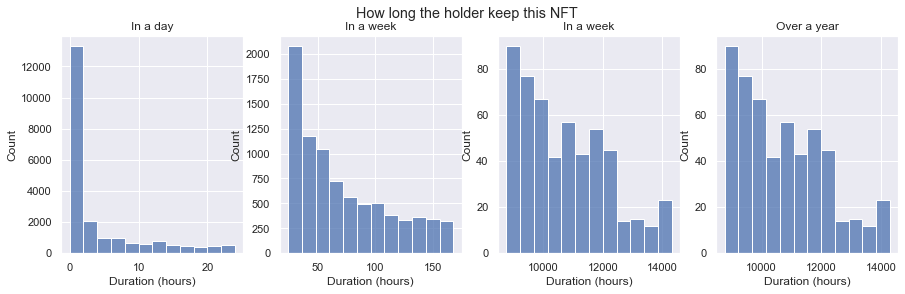

In [61]:
sns.set_theme()
fig,axes = plt.subplots(1,4, figsize = (15,4))
sns.histplot(ax = axes[0], data = transfer['timediff_hours'][transfer['timediff_hours']<=24],bins=12)
sns.histplot(ax = axes[1], data = transfer['timediff_hours'][(transfer['timediff_hours']<=24*7) & (transfer['timediff_hours']>24)],bins=12)
sns.histplot(ax = axes[2], data = transfer['timediff_hours'][(transfer['timediff_hours']>=24*365) & (transfer['timediff_hours']>24*7)],bins=12)
sns.histplot(ax = axes[3], data = transfer['timediff_hours'][transfer['timediff_hours']>24*365],bins=12)

for i in range(4):
    axes[i].set(xlabel = 'Duration (hours)')
axes[0].set_title('In a day')
axes[1].set_title('In a week')
axes[2].set_title('In a week')
axes[3].set_title('Over a year')
fig.suptitle('How long the holder keep this NFT')

In [44]:
#transfer['timestamp'][transfer['token.tokenId']==i].diff().astype('timedelta64[h]')

In [21]:
transfer['from.address'].iloc[:4].astype('str')=='None'

0    True
1    True
2    True
3    True
Name: from.address, dtype: bool

In [22]:
#The first three are Offical addresses, they are market places not real transfer.
transfer_after_mint = transfer[(transfer['from.address'].astype('str') !='None') ]
OfficalAddress = ['KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ','KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk','KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t']
activeFrom = pd.DataFrame(Counter(transfer_after_mine['from.address']).most_common(103))
activeTo = pd.DataFrame(Counter(transfer_after_mine['to.address']).most_common(103))

In [31]:
active_address.head(10)


,address,times_x,times_y,times
0,tz1RTGkN2a5pptXXaHD5h7DVDHEfhgq6E7dY,249.0,267.0,516.0
1,tz1abauhWPL8cPb7NEdipyAff4frNSnqTEs1,152.0,153.0,305.0
2,tz1LpHsQXroEdhaeYscKEKEERtqbym7UhtNm,141.0,142.0,283.0
3,tz1L3BbRDy737vHGzWBuySM3nwjTF323GmWu,128.0,151.0,279.0
4,tz1eraTmjeb1BK5XECtPHBE8AsW6gZESVssV,108.0,107.0,215.0
5,tz1ZFWsL6xXHVsiMEZ6j5VXf5YNeqKPeRJEc,106.0,109.0,215.0
9,tz2Me2mSgJdmNJjRR8LFHWfNqxPAipuez2ng,97.0,118.0,215.0
6,tz1Szb81xB8cVZ5piWhe9jpsoGqD1RDoasNr,105.0,105.0,210.0
13,tz1XccUqBE6t84uRuPb2zkQoNmJjK6kckcKS,89.0,118.0,207.0
7,tz1TZzEmV4b16z1z5QHM7uHaYFqq61SA8gc1,100.0,102.0,202.0


In [23]:
activeFrom.drop([0,1,2], inplace=True)
activeTo.drop([0,1,2], inplace=True)
activeFrom.columns =['address','times']
activeTo.columns =['address','times']

In [24]:
Counter(activeFrom['address'].apply(lambda x: x in list(activeTo['address'])))

Counter({True: 78, False: 22})

In [25]:
activeFrom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 3 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  100 non-null    object
 1   times    100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [26]:
active_address = activeFrom.merge(activeTo, how= 'outer', left_on= 'address', right_on='address')
active_address['times_x'][np.isnan(active_address['times_x'])] =0
active_address['times_y'][np.isnan(active_address['times_y'])] =0
active_address['times'] = active_address['times_x'] + active_address['times_y']
active_address = active_address.sort_values('times', ascending=False)

<ipython-input-26-f4394cd83285>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_address['times_x'][np.isnan(active_address['times_x'])] =0
<ipython-input-26-f4394cd83285>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_address['times_y'][np.isnan(active_address['times_y'])] =0


In [27]:
active_address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   address  122 non-null    object 
 1   times_x  122 non-null    float64
 2   times_y  122 non-null    float64
 3   times    122 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


Text(0.5, 1.0, 'Active accounts')

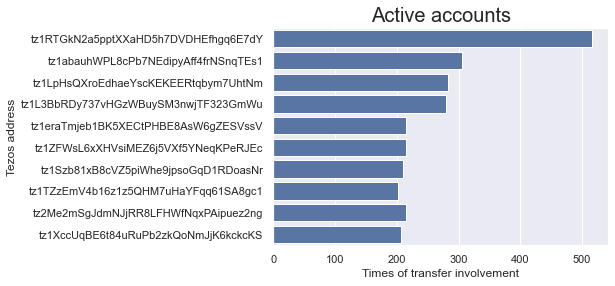

In [28]:
#Plot of active account
sns.set_theme()
a= sns.barplot(x = active_address['times'],y = active_address.iloc[:10]['address'],)
a.set(xlabel = 'Times of transfer involvement', ylabel = 'Tezos address')
a.set_title('Active accounts', fontsize = 20)

Process for holder stastics and My custom function in Python

In [53]:
def add_latest_record (df_tez, column_time, column_number, total_ID):
    last_record = pd.Series([])
    for i in range(total_ID):
        this_token = df_tez[df_tez[column_number]==i+1]
        this_record = this_token[this_token[column_time]==this_token[column_time].max()]
        last_record = pd.concat([last_record, this_record])
    last_record[column_number] = pd.to_numeric(last_record[column_number])
    last_record.drop(columns=0, inplace=True)
    return last_record

In [43]:
#Script of the function
""" last_transfer=pd.Series([])
for i in range(10):
    this_token = transfer[transfer['token.tokenId']==i+1]
    this_record = this_token[this_token['timestamp']==this_token['timestamp'].max()]
    last_transfer = pd.concat([last_transfer, this_record])
last_transfer['token.tokenId'] =pd.to_numeric(last_transfer['token.tokenId'])
last_transfer """


" last_transfer=pd.Series([])\nfor i in range(10):\n    this_token = transfer[transfer['token.tokenId']==i+1]\n    this_record = this_token[this_token['timestamp']==this_token['timestamp'].max()]\n    last_transfer = pd.concat([last_transfer, this_record])\nlast_transfer['token.tokenId'] =pd.to_numeric(last_transfer['token.tokenId'])\nlast_transfer "

In [54]:
last_transfer = add_latest_record(transfer, 'timestamp', 'token.tokenId',12000)

In [55]:
last_transfer.head()

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
42,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz2WogUVRTQb7PfgVdg3aXskDd54Uc18ch9n,2022-06-06 03:47:59+00:00,2.393686e+14,1.0,103 days 04:17:59,NaN,8914679.0,2476.3
15,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,2022-02-23 07:31:40+00:00,1.659701e+14,2.0,0 days 09:30:20,NaN,34220.0,9.6
36,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,2022-04-15 04:47:29+00:00,1.934969e+14,3.0,28 days 19:03:55,NaN,2487835.0,691.1
48,tz1YUu7LL5mhA7sHGKFHAUdCHiC5U1AygGvU,tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP,2023-01-18 21:43:14+00:00,4.382543e+14,4.0,0 days 00:02:00,NaN,120.0,0.1
11,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,2022-02-22 22:55:20+00:00,1.658106e+14,5.0,0 days 00:44:00,NaN,2640.0,0.8


In [56]:
last_transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12011 entries, 42 to 57113
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   from.address     8424 non-null   object             
 1   to.address       12011 non-null  object             
 2   timestamp        12011 non-null  datetime64[ns, UTC]
 3   id               12011 non-null  float64            
 4   token.tokenId    12011 non-null  float64            
 5   timediff_day     8424 non-null   timedelta64[s]     
 6   timediff_hour    0 non-null      object             
 7   timediff_second  8424 non-null   float64            
 8   timediff_hours   8424 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(3), timedelta64[s](1)
memory usage: 938.4+ KB


In [73]:
Counter(last_transfer.duplicated())

Counter({False: 12011})

In [58]:
holder = last_transfer.drop_duplicates() #The first drop
holder = last_transfer.drop_duplicates(subset= ['timestamp', 'token.tokenId'], keep='last') #The second records of at the same second is the last holder

In [59]:
#Holder count
pd.DataFrame(holder['to.address'].unique())

,0
0,tz2WogUVRTQb7PfgVdg3aXskDd54Uc18ch9n
1,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ
2,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm
3,tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP
4,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR
...,...
4354,tz1NvGLtLNTWNYS8dYaLNusLdKyXFz4uMCo1
4355,tz1Ra7JBwFvR5ND2waer6mqGsDuwr7utzArc
4356,tz1bTCPXcufxUnR9nF4wAnjXsQakvguuAZ4T
4357,tz1NLqM94fKksS7YPYp41zbPtwKaRyh6qD1W


In [64]:
#How many address has more than 10 Dogami NFT???
holder.head()

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
42,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz2WogUVRTQb7PfgVdg3aXskDd54Uc18ch9n,2022-06-06 03:47:59+00:00,2.393686e+14,1.0,103 days 04:17:59,NaN,8914679.0,2476.3
15,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,2022-02-23 07:31:40+00:00,1.659701e+14,2.0,0 days 09:30:20,NaN,34220.0,9.6
36,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,2022-04-15 04:47:29+00:00,1.934969e+14,3.0,28 days 19:03:55,NaN,2487835.0,691.1
48,tz1YUu7LL5mhA7sHGKFHAUdCHiC5U1AygGvU,tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP,2023-01-18 21:43:14+00:00,4.382543e+14,4.0,0 days 00:02:00,NaN,120.0,0.1
11,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,2022-02-22 22:55:20+00:00,1.658106e+14,5.0,0 days 00:44:00,NaN,2640.0,0.8


In [60]:
#The top holder in 2023
Top_holder = pd.DataFrame(Counter(holder['to.address']).most_common(10))
print(Top_holder)

                                      0    1
0  KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t  196
1  tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX  116
2  tz1QUhBk8wZdXNCiHvaRKHB6y3UYPSNjzpdK  109
3  tz1NFiJUDasUpobcXVdtKyBj5eDcdmjnAPqt   76
4  tz1QnXJyxuoUTtKmK4vUNJLv4i8CvwNPBdjH   56
5  tz1Tb5zcsm9UfyXn6kyY3ejkF8k7A9pr9gi7   55
6  tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP   51
7  tz1gYTzCckFiJBkn8CAn68XjBSSTzyds8Fs7   50
8  tz1SaUQAyjoyBkLZrVjQj2S7XdT3QR8K14JM   49
9  tz1PKZ5mgEazMLnjEcja5BQEie3Tg3YfURb1   46


In [54]:
#The top holder in 2022
Top_holder = pd.DataFrame(Counter(holder['to.address']).most_common(10))
print(Top_holder)

                                      0    1
0  KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t  138
1  tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX  116
2  tz1NFiJUDasUpobcXVdtKyBj5eDcdmjnAPqt   74
3  tz1QUhBk8wZdXNCiHvaRKHB6y3UYPSNjzpdK   58
4  tz1eraTmjeb1BK5XECtPHBE8AsW6gZESVssV   55
5  tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP   48
6  tz1PKZ5mgEazMLnjEcja5BQEie3Tg3YfURb1   47
7  tz1SaUQAyjoyBkLZrVjQj2S7XdT3QR8K14JM   47
8  tz1R5D5zTCKw5NsQVgCSNp3jia82EVtxmGqf   45
9  tz1g6z1t9yrDzH3W9e6VNn9WYZXXjUM3rkJg   44


In [61]:
Top_holder.columns

RangeIndex(start=0, stop=2, step=1)

Text(0.5, 1.0, 'Top Dogami holders on 2023/10/20')

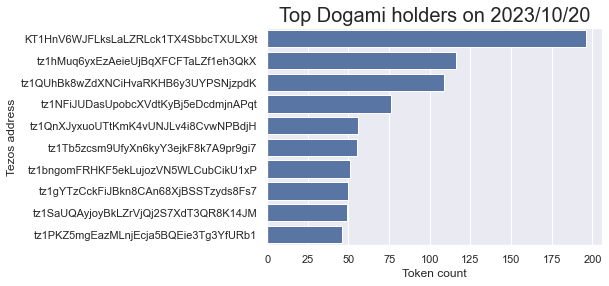

In [63]:
sns.set_style('darkgrid')
sns.set(font_scale=1)
a = sns.barplot(x=1, y=0, data=Top_holder ,color="b")
a.set(xlabel= "Token count", ylabel = "Tezos address")
a.set_title( 'Top Dogami holders on 2023/10/20', fontsize = 20)

A record is missing from data collection, need to check if it is due to API fault or my data manipulation.

In [74]:
holder[holder['to.address']=='tz1hWTVS3RJEVxfxJAwLXxWLqd6rBMFUMLSK']

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
19282,tz1XybkRZWjLx3hwcy1hQ7PT6FWEhpHm1FBv,tz1hWTVS3RJEVxfxJAwLXxWLqd6rBMFUMLSK,2022-04-22 11:13:44+00:00,1.998894e+14,3917.0,57 days 21:38:04,NaN,5002684.0,1389.7


In [75]:
#This is the token missing the last transfer record. The original can be checked in https://tzkt.io/KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd/tokens/3917/transfers
transfer[transfer['token.tokenId']==3917] 

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
19237,None,tz1euTUPRdMQs88gCPYhpVJKjQvbYXJXSf3d,2022-02-23 03:46:00+00:00,1.659067e+14,3917,NaT,NaN,NaN,NaN
19245,tz1euTUPRdMQs88gCPYhpVJKjQvbYXJXSf3d,tz1XybkRZWjLx3hwcy1hQ7PT6FWEhpHm1FBv,2022-02-23 13:35:40+00:00,1.660920e+14,3917,0 days 09:49:40,NaN,35380.0,9.9
19282,tz1XybkRZWjLx3hwcy1hQ7PT6FWEhpHm1FBv,tz1hWTVS3RJEVxfxJAwLXxWLqd6rBMFUMLSK,2022-04-22 11:13:44+00:00,1.998894e+14,3917,57 days 21:38:04,NaN,5002684.0,1389.7


In [109]:
query = '''query MyQuery {
  event(
    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, marketplace_event_type: {_in: ["list_buy", "english_auction_settle", "dutch_auction_buy", "offer_accept", "offer_floor_accept"]}, recipient_address: {_is_null: false}, token: {token_id: {_in: "4320"}}}
  ) {
    id
    price
    timestamp
    token_pk
    token {
      token_id
    }
    recipient_address
    creator_address
    currency {
      current_exchange_rate
      decimals
    }
    currency_id
    marketplace_event_type
  }
}
'''

In [110]:
query

'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, marketplace_event_type: {_in: ["list_buy", "english_auction_settle", "dutch_auction_buy", "offer_accept", "offer_floor_accept"]}, recipient_address: {_is_null: false}, token: {token_id: {_in: "4320"}}}\n  ) {\n    id\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n    currency {\n      current_exchange_rate\n      decimals\n    }\n    currency_id\n    marketplace_event_type\n  }\n}\n'

In [ ]:
r = requests.post(url, json={'query': query})

print(r.status_code)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['data','event'])

In [ ]:
df

#Collect and process the transaction info of Dogami

In [80]:
json_data

{'errors': [{'message': 'invalid input value for enum event_type: "ask_purchase"',
   'extensions': {'path': '$', 'code': 'data-exception'}}]}

In [ ]:
#The trading info of the dogami puppies, the first part (finished code)
data =pd.Series([])
for i in range(120):
#for i in range(201):
    num = list(range(50*i,50*i+50))
    print(num)
    query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, marketplace_event_type: {_in: ["list_buy", "english_auction_settle", "dutch_auction_buy", "offer_accept", "offer_floor_accept"]}, recipient_address: {_is_null: false}, token: {token_id: {_in:  '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n    currency {\n      current_exchange_rate\n      decimals\n    }\n    currency_id\n    marketplace_event_type\n  }\n}\n'
    #query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
    r = requests.post(url, json={'query': query})
    time.sleep(2)
    print(r.status_code)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data, record_path=['data','event'])
    #put df into data
    data = pd.concat([data,df])



In [ ]:
#Add the trading info ofthe Dogami not included in the loop (Second code)
data1 =pd.Series([])
for i in range(120,240):
#for i in range(201):
    num = list(range(50*i,50*i+50))
    print(num)
    query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, marketplace_event_type: {_in: ["list_buy", "english_auction_settle", "dutch_auction_buy", "offer_accept", "offer_floor_accept"]}, recipient_address: {_is_null: false}, token: {token_id: {_in:  '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n    currency {\n      current_exchange_rate\n      decimals\n    }\n    currency_id\n    marketplace_event_type\n  }\n}\n'
    #query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
    r = requests.post(url, json={'query': query})
    time.sleep(2)
    print(r.status_code)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data, record_path=['data','event'])
    #put df into data
    data1 = pd.concat([data1,df])


In [17]:
#Add the trading info ofthe Dogami not included in the loop (finished code)
query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, marketplace_event_type: {_in: ["list_buy", "english_auction_settle", "dutch_auction_buy", "offer_accept", "offer_floor_accept"]}, recipient_address: {_is_null: false}, token: {token_id: {_in: "12000"}}}\n  ) {\n    id\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n    currency {\n      current_exchange_rate\n      decimals\n    }\n    currency_id\n    marketplace_event_type\n  }\n}\n'
#query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
r = requests.post(url, json={'query': query})
time.sleep(2)
print(r.status_code)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['data','event'])

200


In [8]:
data1['token.token_id'] = pd.to_numeric(data1['token.token_id'])

1048

In [119]:
#Ptrade = pd.concat([data,data1]) #Merge two query's data

In [26]:
#Ptrade = pd.DataFrame(data)
#Ptrade.to_excel("Ptrade.xlsx")

In [50]:
Ptrade.drop(columns=0, inplace=True)

In [51]:
Ptrade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              7161 non-null   float64       
 1   price                           7161 non-null   float64       
 2   timestamp                       7161 non-null   object        
 3   token_pk                        7161 non-null   float64       
 4   recipient_address               7161 non-null   object        
 5   creator_address                 7161 non-null   object        
 6   currency_id                     7161 non-null   float64       
 7   marketplace_event_type          7161 non-null   object        
 8   token.token_id                  7161 non-null   int64         
 9   currency.current_exchange_rate  44 non-null     float64       
 10  currency.decimals               7161 non-null   float64       
 11  ts_new     

In [37]:
#Ptrade['ts_new'].dt.isocalendar().week

0      7
1     18
2     18
3     41
4      3
      ..
8     37
9      8
10    21
11    25
12    26
Name: week, Length: 7161, dtype: UInt32

In [ ]:
#Process the dataframe
Ptrade['ts_new']=Ptrade['timestamp'].astype('str').apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+00:00"))
Ptrade['Week']= Ptrade['ts_new'].dt.isocalendar().week #create a week column
Ptrade['month']= Ptrade['ts_new'].dt.month
Ptrade['token.token_id'] = pd.to_numeric(Ptrade['token.token_id']) #Change format to int64

In [52]:
Ptrade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              7161 non-null   float64       
 1   price                           7161 non-null   float64       
 2   timestamp                       7161 non-null   object        
 3   token_pk                        7161 non-null   float64       
 4   recipient_address               7161 non-null   object        
 5   creator_address                 7161 non-null   object        
 6   currency_id                     7161 non-null   float64       
 7   marketplace_event_type          7161 non-null   object        
 8   token.token_id                  7161 non-null   int64         
 9   currency.current_exchange_rate  44 non-null     float64       
 10  currency.decimals               7161 non-null   float64       
 11  ts_new     

In [13]:
box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2097 non-null   float64       
 1   price                           2097 non-null   float64       
 2   timestamp                       2097 non-null   object        
 3   token_pk                        2097 non-null   float64       
 4   recipient_address               2097 non-null   object        
 5   creator_address                 2097 non-null   object        
 6   currency_id                     2097 non-null   float64       
 7   marketplace_event_type          2097 non-null   object        
 8   token.token_id                  2097 non-null   int64         
 9   currency.current_exchange_rate  4 non-null      float64       
 10  currency.decimals               2097 non-null   float64       
 11  ts_n

In [ ]:
#Ptrade = Ptrade.merge(Metadata_2[['token_id', 'last_metadata_update']], how ='left', left_on='token.token_id', right_on='token_id') #Merge the columns to get last metadata update
#Ptrade.drop('token_id',axis=1,inplace= True)

In [ ]:
#Unused sector because the column 'last_metadata_date' is not needed anamore
#The foris different in datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
#Ptrade['last_metadata_dateformat']=Ptrade['last_metadata_update'].astype('str').apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))
#Ptrade['last_metadata_date']= Ptrade['last_metadata_dateformat'].dt.date

In [54]:
#Add Birthday column from another table
Ptrade = Ptrade.merge(puppies[['token_id','Birthday','Rarity tier','Rarity score']], left_on= 'token.token_id', right_on='token_id')
puppies.head()

,token_id,token_pk,Birthday,Bonding level,Breed,Breeding count,Eyes color,Friendliness,Fur color,Gender,...,Rarity tier,Secondary personality,Size,Status,Strength,Vitality,Rarity tier_Bronze,Rarity tier_Diamond,Rarity tier_Gold,Rarity tier_Silver
0,3,24946,15-Apr-2022,1,Golden Retriever,0,Black #5,12,Cream #5,Male,...,Diamond,Gentle,Medium male,Puppy,3,5,0,1,0,0
1,4,25265,05-Mar-2022,1,Labrador,0,Brown #5,8,Black #11,Male,...,Diamond,Charming,Small male,Puppy,6,3,0,1,0,0
2,7,25474,04-Mar-2022,1,Husky,0,Brown #3,3,Black & white #11,Female,...,Bronze,Devoted,Small female,Puppy,5,5,1,0,0,0
3,8,25907,08-Mar-2022,1,Toy Poodle,0,Grey #5,3,Apricot #6,Female,...,Bronze,Jolly,Medium female,Puppy,10,6,1,0,0,0
4,9,25798,06-Mar-2022,1,Husky,0,Green #5,3,Chocolate & white #2,Male,...,Bronze,Gentle,Medium male,Puppy,8,8,1,0,0,0


In [55]:
Ptrade.head()

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month,token_id,Birthday,Rarity tier,Rarity score
0,49315456.0,87010000.0,2023-02-13T20:11:14+00:00,31387.0,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,tz1Twz3EaEcAwkBkXV5YQwLNbLruErA5TV8k,1.0,offer_floor_accept,40,NaN,6.0,2023-02-13 20:11:14,7,2,40,10-Mar-2022,Bronze,2331.80
1,200913.0,108000000.0,2022-10-11T05:50:14+00:00,31387.0,tz1Twz3EaEcAwkBkXV5YQwLNbLruErA5TV8k,tz1aBYEyvzhMVzP2yTCUMF9LP9UZR4PZSVLJ,1.0,list_buy,40,NaN,6.0,2022-10-11 05:50:14,41,10,40,10-Mar-2022,Bronze,2331.80
2,386972.0,101000000.0,2023-03-12T21:54:29+00:00,31387.0,tz1cMzj8Gd9Q9VcRHco2dQMQfNhcepxUT1Tn,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,1.0,list_buy,40,NaN,6.0,2023-03-12 21:54:29,10,3,40,10-Mar-2022,Bronze,2331.80
3,9295202.0,340000000.0,2022-03-11T08:04:54+00:00,31387.0,tz1TZzEmV4b16z1z5QHM7uHaYFqq61SA8gc1,tz1dQxBZzCAh5Y8YGoXRR9sgqVAU7gkL493v,1.0,list_buy,40,NaN,6.0,2022-03-11 08:04:54,10,3,40,10-Mar-2022,Bronze,2331.80
4,50272422.0,39900000.0,2023-05-02T15:32:04+00:00,34437.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1TjNmNC7LDRGgJxKjhghsQ7Fz8rvH9av5Y,176317.0,list_buy,46,NaN,2.0,2023-05-02 15:32:04,18,5,46,02-May-2023,Silver,7580.36


In [ ]:
#exclude the price = NaN record, they are unsold auctions 
#Ptrade = Ptrade[Ptrade['price'].astype('str')!='nan']

In [56]:
Counter(Ptrade['price'])

Counter({300000000.0: 209,
         350000000.0: 157,
         400000000.0: 119,
         250000000.0: 111,
         100000000.0: 104,
         200000000.0: 97,
         280000000.0: 97,
         450000000.0: 81,
         330000000.0: 73,
         299000000.0: 72,
         340000000.0: 71,
         500000000.0: 69,
         220000000.0: 68,
         150000000.0: 67,
         290000000.0: 65,
         320000000.0: 64,
         380000000.0: 63,
         270000000.0: 62,
         360000000.0: 61,
         120000000.0: 59,
         180000000.0: 56,
         90000000.0: 56,
         375000000.0: 55,
         420000000.0: 51,
         550000000.0: 51,
         333000000.0: 48,
         240000000.0: 48,
         80000000.0: 48,
         95000000.0: 47,
         399000000.0: 45,
         230000000.0: 45,
         130000000.0: 44,
         85000000.0: 44,
         110000000.0: 43,
         349000000.0: 42,
         310000000.0: 42,
         260000000.0: 41,
         370000000.0: 40,
         27

In [57]:
Ptrade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6916 non-null   float64       
 1   price                           6916 non-null   float64       
 2   timestamp                       6916 non-null   object        
 3   token_pk                        6916 non-null   float64       
 4   recipient_address               6916 non-null   object        
 5   creator_address                 6916 non-null   object        
 6   currency_id                     6916 non-null   float64       
 7   marketplace_event_type          6916 non-null   object        
 8   token.token_id                  6916 non-null   int64         
 9   currency.current_exchange_rate  44 non-null     float64       
 10  currency.decimals               6916 non-null   float64       
 11  ts_n

In [58]:
Ptrade[Ptrade['ts_new']<Ptrade['Birthday']].head(10) #These are the trades when puppies were boxes

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month,token_id,Birthday,Rarity tier,Rarity score
7,3832941.0,1.200000e+09,2022-02-23T01:41:00+00:00,25265.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,1.0,list_buy,4,NaN,6.0,2022-02-23 01:41:00,8,2,4,05-Mar-2022,Diamond,8709.46
9,6720021.0,5.000000e+08,2022-03-03T21:22:04+00:00,30448.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz2SdXypEiAy63fDy2K5xhtvnxhyvTXDTH2Q,1.0,list_buy,36,NaN,6.0,2022-03-03 21:22:04,9,3,36,04-Mar-2022,Silver,5488.97
11,4307815.0,9.500000e+08,2022-02-24T21:38:00+00:00,28214.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1cp312oRvwp5honfR55EsWUF1nA7QZYxT7,1.0,list_buy,23,NaN,6.0,2022-02-24 21:38:00,8,2,23,04-Mar-2022,Silver,5631.25
13,3763007.0,4.490000e+08,2022-02-22T22:34:50+00:00,26961.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,1.0,list_buy,18,NaN,6.0,2022-02-22 22:34:50,8,2,18,20-Feb-2023,Diamond,9019.19
14,3761516.0,6.660000e+08,2022-02-22T22:27:50+00:00,24946.0,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,1.0,list_buy,3,NaN,6.0,2022-02-22 22:27:50,8,2,3,15-Apr-2022,Diamond,9115.57
16,3766666.0,4.000000e+08,2022-02-22T22:48:50+00:00,27172.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,1.0,offer_accept,17,NaN,6.0,2022-02-22 22:48:50,8,2,17,06-Mar-2022,Bronze,5579.70
17,3962242.0,5.000000e+08,2022-02-23T15:53:10+00:00,27172.0,tz1QFpBctBDgmFZ7dxG4ZtLPkM2DhoNZSNea,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,1.0,list_buy,17,NaN,6.0,2022-02-23 15:53:10,8,2,17,06-Mar-2022,Bronze,5579.70
18,3771261.0,4.000000e+08,2022-02-22T23:01:20+00:00,26206.0,tz1RzSXgXfsZW7oiT3vfAYnAW2TuzxcqL5uy,tz1aqJjtx4ZAJsuVTwXhzmZanY5WYd7CCrHJ,1.0,list_buy,10,NaN,6.0,2022-02-22 23:01:20,8,2,10,04-Mar-2022,Bronze,4999.77
20,3921565.0,4.600000e+08,2022-02-23T13:19:10+00:00,26858.0,tz1Vj3y6sAtDVPZ25XHjCiNnxZZ3SZcPyuHc,tz1cp312oRvwp5honfR55EsWUF1nA7QZYxT7,1.0,list_buy,16,NaN,6.0,2022-02-23 13:19:10,8,2,16,04-Mar-2022,Silver,4855.71
21,6239609.0,5.000000e+08,2022-03-02T18:08:04+00:00,26484.0,tz1dEZ79EzpxbaVfFqiDwFzjM4ZCQqsdLQ1x,tz1XA1jR6WjMen73zcc9nRfKyCWV6CUdoeVq,1.0,list_buy,12,NaN,6.0,2022-03-02 18:08:04,9,3,12,04-Mar-2022,Gold,8191.82


array(['Puppy'], dtype=object)

###Selece Box Dogami from 12000 NFTs, and add the box trades when Dogami are boxes now and then

In [59]:
#[i in range(1,10) for i in puppies['token_id'][:10]] # so weird, when I use this statement, it gives me all true value
""" a = [len(puppies[puppies['token_id'] == i+1]) ==0 for i in range(12000)] #Get a Boolean list
box=[]
for i in range(12000):
    if a[i]:
        box.extend([i+1])  """

In [60]:
[i in puppies['token_id'] for i in range(10)] #Indeed token ID do not include 0,1,2

[True, True, True, True, True, True, True, True, True, True]

In [66]:
539/12000


0.04491666666666667

In [82]:
puppies

,token_id,token_pk,Birthday,Bonding level,Breed,Breeding count,Eyes color,Friendliness,Fur color,Gender,...,Rarity tier,Secondary personality,Size,Status,Strength,Vitality,Rarity tier_Bronze,Rarity tier_Diamond,Rarity tier_Gold,Rarity tier_Silver
0,3,24946,15-Apr-2022,1,Golden Retriever,0,Black #5,12,Cream #5,Male,...,Diamond,Gentle,Medium male,Puppy,3,5,0,1,0,0
1,4,25265,05-Mar-2022,1,Labrador,0,Brown #5,8,Black #11,Male,...,Diamond,Charming,Small male,Puppy,6,3,0,1,0,0
2,7,25474,04-Mar-2022,1,Husky,0,Brown #3,3,Black & white #11,Female,...,Bronze,Devoted,Small female,Puppy,5,5,1,0,0,0
3,8,25907,08-Mar-2022,1,Toy Poodle,0,Grey #5,3,Apricot #6,Female,...,Bronze,Jolly,Medium female,Puppy,10,6,1,0,0,0
4,9,25798,06-Mar-2022,1,Husky,0,Green #5,3,Chocolate & white #2,Male,...,Bronze,Gentle,Medium male,Puppy,8,8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,11994,159390,22-Jun-2022,1,Welsh Corgi,0,Black #1,5,Red #3,Male,...,Silver,Foodie,Medium male,Puppy,4,5,0,0,0,1
10489,11995,4629331,28-Jun-2022,1,Chow Chow,0,Brown #1,4,Cream #10,Female,...,Bronze,Emotional,Medium female,Puppy,4,3,1,0,0,0
10490,11996,204060,22-Jun-2022,1,Welsh Corgi,0,Black #4,11,Red #9,Male,...,Bronze,Brave,Medium male,Puppy,3,5,1,0,0,0
10491,11998,4629508,23-Jun-2022,1,Australian Shepherd,0,Brown #4,4,Two-tone black #9,Female,...,Silver,Stubborn,Large female,Puppy,3,5,0,0,0,1


In [83]:
#Test the box loop
""" for i in range(5):
    print(box[10*i:10*i+10]) """
    

[1, 2, 5, 6, 20, 30, 34, 47, 60, 61]
[69, 77, 78, 89, 90, 91, 101, 152, 162, 182]
[191, 192, 204, 205, 215, 216, 228, 238, 242, 245]
[284, 285, 315, 317, 330, 331, 333, 342, 343, 361]
[362, 375, 385, 400, 405, 406, 443, 468, 469, 491]


In [102]:
#Get Box trade info ( the offical query)
data =pd.Series([])
for i in range(149,151):
    num = box[10*i:10*i+10]
    print(i,num)
    query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, marketplace_event_type: {_in: ["list_buy", "english_auction_settle", "dutch_auction_buy", "offer_accept", "offer_floor_accept"]}, recipient_address: {_is_null: false}, token: {token_id: {_in:  '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n    currency {\n      current_exchange_rate\n      decimals\n    }\n    currency_id\n    marketplace_event_type\n  }\n}\n'
    r = requests.post(url, json={'query': query})
    time.sleep(2)
    print(r.status_code)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data, record_path=['data','event'])
    #put df into data
    data = pd.concat([data,df])

149 [11859, 11862, 11874, 11875, 11878, 11892, 11906, 11919, 11933, 11955]
200
150 [11956, 11964, 11972, 11987, 11990, 11997, 11999]
200


,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month
0,3769159.0,499.0,2022-02-22T22:55:20+00:00,25143.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,1.0,list_buy,5,NaN,6.0,2022-02-22 22:55:20,8,2
1,3781483.0,1499.0,2022-02-22T23:30:00+00:00,24763.0,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1.0,list_buy,1,NaN,6.0,2022-02-22 23:30:00,8,2
2,3876321.0,1299.0,2022-02-23T07:31:40+00:00,24615.0,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1.0,list_buy,2,NaN,6.0,2022-02-23 07:31:40,8,2
3,53384561.0,470.0,2023-07-19T00:19:24+00:00,30160.0,tz1Vp5Rk8DMTmy7xF6FvfitQX3JbZh5tck35,tz1epfqyfEm2GADnp3jQbVcPc4QZ8BcP9bWF,1.0,list_buy,34,NaN,6.0,2023-07-19 00:19:24,29,7
4,4434123.0,350.0,2022-02-25T14:28:04+00:00,39790.0,tz1TxsCexGtMqC9PxZSiKt6RfHdKT9Z3USvD,tz1cmriyiRxShAKeSgywn3GmegPddTXkxXse,1.0,offer_accept,78,NaN,6.0,2022-02-25 14:28:04,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,393820.0,200.0,2023-03-18T14:59:14+00:00,526143.0,tz1PKZ5mgEazMLnjEcja5BQEie3Tg3YfURb1,tz1Vxf2riLzH9xhg7X4qXnQi9go4vhV4546H,1.0,list_buy,11941,NaN,6.0,2023-03-18 14:59:14,11,3
2093,26306552.0,280.0,2022-06-03T14:28:44+00:00,4623452.0,tz1WCN2vZAVAfrzYwR9h6pN7BoZyX1PgG6hb,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,1.0,list_buy,11904,NaN,6.0,2022-06-03 14:28:44,22,6
2094,26720295.0,324.0,2022-06-06T17:40:29+00:00,4625202.0,tz1VfXxziDTpwG9xDrzpSrnxJ3k9HzjjYnud,tz1UsEUAoxwNTmxnZHuYHC3wvXHJokM4oVFs,1.0,list_buy,11932,NaN,6.0,2022-06-06 17:40:29,23,6
2095,26304552.0,269.0,2022-06-03T14:14:44+00:00,4626990.0,tz1abwkvdcJ1aHPJfu2piT12V4iPmjVWAQdm,tz1eBfs5UhGcxViewkjX7MUATo438okHQLXD,1.0,list_buy,11959,NaN,6.0,2022-06-03 14:14:44,22,6


In [106]:
#Process the dataframe
box['ts_new']=box['timestamp'].astype('str').apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+00:00"))
box['Week']= box['ts_new'].dt.isocalendar().week
box['month']=box['ts_new'].dt.month
box['token.token_id'] = pd.to_numeric(box['token.token_id'])
#box.merge(Metadata_2[['token_id', 'last_metadata_update']], how ='left', left_on='token.token_id', right_on='token_id') #Add a column from another table
box.drop(columns=0, inplace=True) #Drop one unnecessary column

In [14]:
box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2097 non-null   float64       
 1   price                           2097 non-null   float64       
 2   timestamp                       2097 non-null   object        
 3   token_pk                        2097 non-null   float64       
 4   recipient_address               2097 non-null   object        
 5   creator_address                 2097 non-null   object        
 6   currency_id                     2097 non-null   float64       
 7   marketplace_event_type          2097 non-null   object        
 8   token.token_id                  2097 non-null   int64         
 9   currency.current_exchange_rate  4 non-null      float64       
 10  currency.decimals               2097 non-null   float64       
 11  ts_n

In [109]:
Ptrade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6916 non-null   float64       
 1   price                           6916 non-null   float64       
 2   timestamp                       6916 non-null   object        
 3   token_pk                        6916 non-null   float64       
 4   recipient_address               6916 non-null   object        
 5   creator_address                 6916 non-null   object        
 6   currency_id                     6916 non-null   float64       
 7   marketplace_event_type          6916 non-null   object        
 8   token.token_id                  6916 non-null   int64         
 9   currency.current_exchange_rate  44 non-null     float64       
 10  currency.decimals               6916 non-null   float64       
 11  ts_n

In [114]:
list(box)

['id',
 'price',
 'timestamp',
 'token_pk',
 'recipient_address',
 'creator_address',
 'currency_id',
 'marketplace_event_type',
 'token.token_id',
 'currency.current_exchange_rate',
 'currency.decimals',
 'ts_new',
 'Week',
 'month']

In [115]:
#Temp variable a is the trasaction of puppies when they were boxes
a = Ptrade[['id', 'price', 'timestamp', 'token_pk',
       'recipient_address', 'creator_address','currency_id','marketplace_event_type' ,'token.token_id',
       'currency.current_exchange_rate','currency.decimals','ts_new',
       'Week','month']][Ptrade['ts_new']<Ptrade['Birthday']]
a.head()

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month
7,3832941.0,1.200000e+09,2022-02-23T01:41:00+00:00,25265.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,1.0,list_buy,4,NaN,6.0,2022-02-23 01:41:00,8,2
9,6720021.0,5.000000e+08,2022-03-03T21:22:04+00:00,30448.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz2SdXypEiAy63fDy2K5xhtvnxhyvTXDTH2Q,1.0,list_buy,36,NaN,6.0,2022-03-03 21:22:04,9,3
11,4307815.0,9.500000e+08,2022-02-24T21:38:00+00:00,28214.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1cp312oRvwp5honfR55EsWUF1nA7QZYxT7,1.0,list_buy,23,NaN,6.0,2022-02-24 21:38:00,8,2
13,3763007.0,4.490000e+08,2022-02-22T22:34:50+00:00,26961.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,1.0,list_buy,18,NaN,6.0,2022-02-22 22:34:50,8,2
14,3761516.0,6.660000e+08,2022-02-22T22:27:50+00:00,24946.0,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,1.0,list_buy,3,NaN,6.0,2022-02-22 22:27:50,8,2


In [116]:
x = pd.concat([x, a])

<ipython-input-116-dd5f4b92d704>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  box = pd.concat([box, a])


In [118]:
len(box)+len(Ptrade[Ptrade['ts_new']>Ptrade['Birthday']])



7161

In [119]:
Ptrade_final = Ptrade[Ptrade['ts_new']>Ptrade['Birthday']]
Ptrade_final.head()
#Add rarity tier and rarity score to the table
#Ptrade_final = Ptrade_final.merge(puppies[['token_id','Rarity tier','Rarity score']], left_on='token_id', right_on='token_id')
#Finally we left 2794 transaction of puppies and 1869 transaction of boxes

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month,token_id,Birthday,Rarity tier,Rarity score
0,49315456.0,87010000.0,2023-02-13T20:11:14+00:00,31387.0,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,tz1Twz3EaEcAwkBkXV5YQwLNbLruErA5TV8k,1.0,offer_floor_accept,40,NaN,6.0,2023-02-13 20:11:14,7,2,40,10-Mar-2022,Bronze,2331.80
1,200913.0,108000000.0,2022-10-11T05:50:14+00:00,31387.0,tz1Twz3EaEcAwkBkXV5YQwLNbLruErA5TV8k,tz1aBYEyvzhMVzP2yTCUMF9LP9UZR4PZSVLJ,1.0,list_buy,40,NaN,6.0,2022-10-11 05:50:14,41,10,40,10-Mar-2022,Bronze,2331.80
2,386972.0,101000000.0,2023-03-12T21:54:29+00:00,31387.0,tz1cMzj8Gd9Q9VcRHco2dQMQfNhcepxUT1Tn,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,1.0,list_buy,40,NaN,6.0,2023-03-12 21:54:29,10,3,40,10-Mar-2022,Bronze,2331.80
3,9295202.0,340000000.0,2022-03-11T08:04:54+00:00,31387.0,tz1TZzEmV4b16z1z5QHM7uHaYFqq61SA8gc1,tz1dQxBZzCAh5Y8YGoXRR9sgqVAU7gkL493v,1.0,list_buy,40,NaN,6.0,2022-03-11 08:04:54,10,3,40,10-Mar-2022,Bronze,2331.80
4,50272422.0,39900000.0,2023-05-02T15:32:04+00:00,34437.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1TjNmNC7LDRGgJxKjhghsQ7Fz8rvH9av5Y,176317.0,list_buy,46,NaN,2.0,2023-05-02 15:32:04,18,5,46,02-May-2023,Silver,7580.36


In [120]:
#fix the price to original
box.price = box.price/1000000
Ptrade_final.price = Ptrade_final.price/1000000


<ipython-input-120-9f8197a1ce85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ptrade_final.price = Ptrade_final.price/1000000


In [122]:
#Reorder Box indices
box.index = range(2097)

In [123]:
#Add rarity tier and rarity score
Ptrade_final.head()

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month,token_id,Birthday,Rarity tier,Rarity score
0,49315456.0,87.01,2023-02-13T20:11:14+00:00,31387.0,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,tz1Twz3EaEcAwkBkXV5YQwLNbLruErA5TV8k,1.0,offer_floor_accept,40,NaN,6.0,2023-02-13 20:11:14,7,2,40,10-Mar-2022,Bronze,2331.80
1,200913.0,108.00,2022-10-11T05:50:14+00:00,31387.0,tz1Twz3EaEcAwkBkXV5YQwLNbLruErA5TV8k,tz1aBYEyvzhMVzP2yTCUMF9LP9UZR4PZSVLJ,1.0,list_buy,40,NaN,6.0,2022-10-11 05:50:14,41,10,40,10-Mar-2022,Bronze,2331.80
2,386972.0,101.00,2023-03-12T21:54:29+00:00,31387.0,tz1cMzj8Gd9Q9VcRHco2dQMQfNhcepxUT1Tn,tz1S1LD9ekEU7HuWgBNxhsxJ7Av7x8y6ccNW,1.0,list_buy,40,NaN,6.0,2023-03-12 21:54:29,10,3,40,10-Mar-2022,Bronze,2331.80
3,9295202.0,340.00,2022-03-11T08:04:54+00:00,31387.0,tz1TZzEmV4b16z1z5QHM7uHaYFqq61SA8gc1,tz1dQxBZzCAh5Y8YGoXRR9sgqVAU7gkL493v,1.0,list_buy,40,NaN,6.0,2022-03-11 08:04:54,10,3,40,10-Mar-2022,Bronze,2331.80
4,50272422.0,39.90,2023-05-02T15:32:04+00:00,34437.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1TjNmNC7LDRGgJxKjhghsQ7Fz8rvH9av5Y,176317.0,list_buy,46,NaN,2.0,2023-05-02 15:32:04,18,5,46,02-May-2023,Silver,7580.36


In [124]:
print(Counter(box['token.token_id']).most_common(6))
Counter(Ptrade_final['token_id']).most_common(6) #The most traded puppies, no too many traded


[(5079, 5), (3269, 4), (6382, 4), (937, 3), (3086, 3), (214, 3)]


[(8754, 8), (8155, 7), (977, 6), (1898, 6), (3144, 6), (3161, 6)]

In [127]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852 entries, 7 to 6909
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1852 non-null   float64       
 1   price                           1852 non-null   float64       
 2   timestamp                       1852 non-null   object        
 3   token_pk                        1852 non-null   float64       
 4   recipient_address               1852 non-null   object        
 5   creator_address                 1852 non-null   object        
 6   currency_id                     1852 non-null   float64       
 7   marketplace_event_type          1852 non-null   object        
 8   token.token_id                  1852 non-null   int64         
 9   currency.current_exchange_rate  4 non-null      float64       
 10  currency.decimals               1852 non-null   float64       
 11  ts_new   

In [134]:
box

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month
0,3769159.0,499.0,2022-02-22T22:55:20+00:00,25143.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,1.0,list_buy,5,NaN,6.0,2022-02-22 22:55:20,8,2
1,3781483.0,1499.0,2022-02-22T23:30:00+00:00,24763.0,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1.0,list_buy,1,NaN,6.0,2022-02-22 23:30:00,8,2
2,3876321.0,1299.0,2022-02-23T07:31:40+00:00,24615.0,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1.0,list_buy,2,NaN,6.0,2022-02-23 07:31:40,8,2
3,53384561.0,470.0,2023-07-19T00:19:24+00:00,30160.0,tz1Vp5Rk8DMTmy7xF6FvfitQX3JbZh5tck35,tz1epfqyfEm2GADnp3jQbVcPc4QZ8BcP9bWF,1.0,list_buy,34,NaN,6.0,2023-07-19 00:19:24,29,7
4,4434123.0,350.0,2022-02-25T14:28:04+00:00,39790.0,tz1TxsCexGtMqC9PxZSiKt6RfHdKT9Z3USvD,tz1cmriyiRxShAKeSgywn3GmegPddTXkxXse,1.0,offer_accept,78,NaN,6.0,2022-02-25 14:28:04,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,393820.0,200.0,2023-03-18T14:59:14+00:00,526143.0,tz1PKZ5mgEazMLnjEcja5BQEie3Tg3YfURb1,tz1Vxf2riLzH9xhg7X4qXnQi9go4vhV4546H,1.0,list_buy,11941,NaN,6.0,2023-03-18 14:59:14,11,3
2093,26306552.0,280.0,2022-06-03T14:28:44+00:00,4623452.0,tz1WCN2vZAVAfrzYwR9h6pN7BoZyX1PgG6hb,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,1.0,list_buy,11904,NaN,6.0,2022-06-03 14:28:44,22,6
2094,26720295.0,324.0,2022-06-06T17:40:29+00:00,4625202.0,tz1VfXxziDTpwG9xDrzpSrnxJ3k9HzjjYnud,tz1UsEUAoxwNTmxnZHuYHC3wvXHJokM4oVFs,1.0,list_buy,11932,NaN,6.0,2022-06-06 17:40:29,23,6
2095,26304552.0,269.0,2022-06-03T14:14:44+00:00,4626990.0,tz1abwkvdcJ1aHPJfu2piT12V4iPmjVWAQdm,tz1eBfs5UhGcxViewkjX7MUATo438okHQLXD,1.0,list_buy,11959,NaN,6.0,2022-06-03 14:14:44,22,6


In [192]:
Counter(box['currency_id'])

Counter({1.0: 2052, 4.0: 41, 1429.0: 4})

In [ ]:
box[box['currency_id']== 4]

[Text(0, 0.5, 'Price(XTZ)'),
 Text(0.5, 1.0, 'Dogami Box transactions in weeks(2022)')]

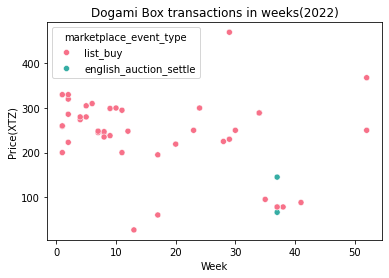

In [15]:
a=sns.scatterplot(box[box['timestamp']>'2023-01-01'], x='Week', y='price',hue='marketplace_event_type', palette='husl')
a.set(ylabel= 'Price(XTZ)',title='Dogami Box transactions in weeks(2022)')

In [57]:
365/7
#下一次可以加上52周

52.142857142857146

In [207]:
box[(box['timestamp']>'2023-01-01')&(box['currency_id'] == 1429)]

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month,year
1959,399995.0,26.5,2023-03-27T10:27:29+00:00,519313.0,tz1bNorzj2K1UDq6b1whCAiMtCRG8FjrStjC,tz1dyx5UQYnE8AmzCe1FMer3eduBCGagvPMC,1429.0,list_buy,10780,0.010584,5.0,2023-03-27 10:27:29,13,3,2023


[Text(0, 0.5, 'Price(0-1600 Xtz)'),
 Text(0.5, 1.0, 'Dogami Box transactions in weeks(2022)')]

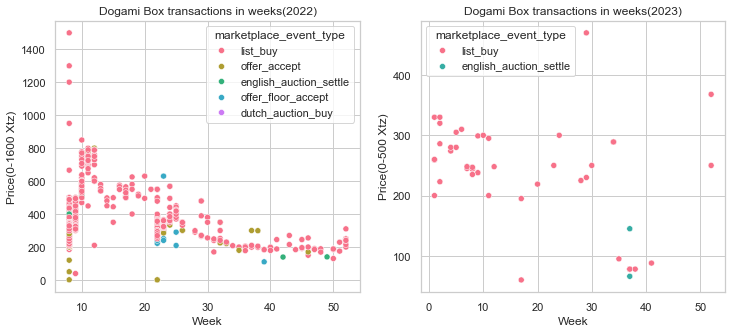

In [208]:
sns.set_theme(style="whitegrid", palette="pastel")
fig,axes = plt.subplots(1, 2, figsize = (12,5))
sns.scatterplot(ax = axes[1], data = box[(box['timestamp']>='2023-01-01')&(box['currency_id'] != 1429)], x='Week', y='price',hue='marketplace_event_type', palette='husl')
axes[1].set(ylabel= 'Price(0-500 Xtz)',title='Dogami Box transactions in weeks(2023)')

sns.scatterplot(ax = axes[0], data = box[(box['timestamp']<'2023-01-01')&(box['currency_id'] != 1429)], x='Week', y='price',hue='marketplace_event_type', palette='husl')
axes[0].set(ylabel= 'Price(0-1600 Xtz)',title='Dogami Box transactions in weeks(2022)')

,from.address,to.address,timestamp,id,token.tokenId
0,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,2
1,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,1
2,None,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,2022-02-22T22:07:20Z,1.657933e+14,3
3,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22T22:11:20Z,1.657945e+14,5
4,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22T22:11:20Z,1.657945e+14,4
...,...,...,...,...,...
28,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1ZFBbBCD8cAEE2nKpinT8eSmWCVNEaxrfF,2022-09-08T12:06:29Z,3.217187e+14,11996
29,tz1ZFBbBCD8cAEE2nKpinT8eSmWCVNEaxrfF,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2022-11-07T12:13:59Z,3.727853e+14,11996
30,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1NLqM94fKksS7YPYp41zbPtwKaRyh6qD1W,2022-11-24T15:07:44Z,3.884420e+14,11996
31,tz1XUtVSyA3Yyf9ojvm37kNDQy2oTDGRHnsb,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2023-01-30T22:33:29Z,4.492093e+14,12000


In [ ]:
""" sns.histplot(ax = axes[0], data = transfer['timediff_hours'][transfer['timediff_hours']<=24],bins=12)
for i in range(3):
    axes[i].set(xlabel = 'Duration (hours)')
axes[0].set_title('In a day')
axes[1].set_title('In a week')
axes[2].set_title('Over a week')
fig.suptitle('How long the holder keep this NFT') """

In [59]:
box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2097 non-null   float64       
 1   price                           2097 non-null   float64       
 2   timestamp                       2097 non-null   object        
 3   token_pk                        2097 non-null   float64       
 4   recipient_address               2097 non-null   object        
 5   creator_address                 2097 non-null   object        
 6   currency_id                     2097 non-null   float64       
 7   marketplace_event_type          2097 non-null   object        
 8   token.token_id                  2097 non-null   int64         
 9   currency.current_exchange_rate  4 non-null      float64       
 10  currency.decimals               2097 non-null   float64       
 11  ts_n

#Create another type of group box plot, using Month_year in the X label
Box variable is the pre condition

In [18]:
pd.to_datetime(box['timestamp']).dt.to_period('M')

<ipython-input-18-490e006de254>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pd.to_datetime(box['timestamp']).dt.to_period('M')


0       2022-02
1       2022-02
2       2022-02
3       2023-07
4       2022-02
         ...   
2092    2023-03
2093    2022-06
2094    2022-06
2095    2022-06
2096    2022-06
Name: timestamp, Length: 2097, dtype: period[M]

In [58]:
box_group= box[['Month_year','marketplace_event_type','price']].groupby(['Month_year','marketplace_event_type'], as_index = False).mean()
box_group['Month_year'] = box_group['Month_year'].astype(str)

In [60]:
box_group['Month_year'] = box_group['Month_year'].astype(str)

<ipython-input-102-bc89054e5d35>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels() ,rotation=30)


[Text(0, 0, '2022-02'),
 Text(1, 0, '2022-03'),
 Text(2, 0, '2022-04'),
 Text(3, 0, '2022-05'),
 Text(4, 0, '2022-06'),
 Text(5, 0, '2022-07'),
 Text(6, 0, '2022-08'),
 Text(7, 0, '2022-09'),
 Text(8, 0, '2022-10'),
 Text(9, 0, '2022-11'),
 Text(10, 0, '2022-12'),
 Text(11, 0, '2023-01'),
 Text(12, 0, '2023-02'),
 Text(13, 0, '2023-03'),
 Text(14, 0, '2023-04'),
 Text(15, 0, '2023-05'),
 Text(16, 0, '2023-06'),
 Text(17, 0, '2023-07'),
 Text(18, 0, '2023-08'),
 Text(19, 0, '2023-09'),
 Text(20, 0, '2023-10')]

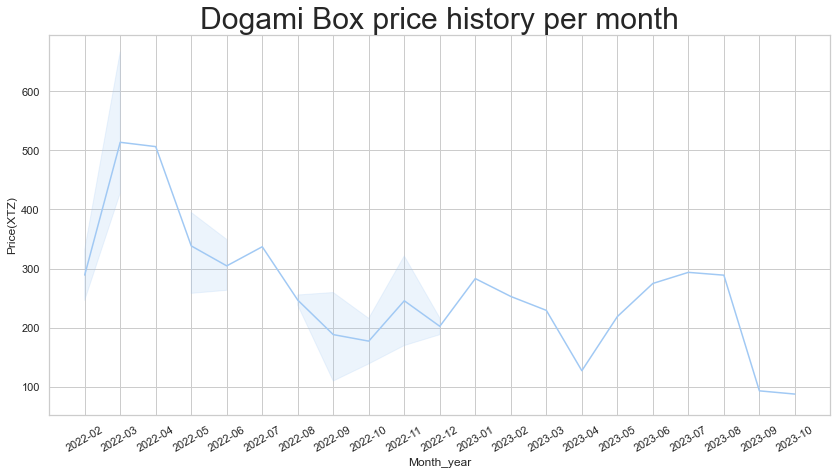

In [102]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(box_group, x='Month_year', y='price')
a.set(ylabel='Price(XTZ)')
plt.title('Dogami Box price history per month', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

In [106]:
a=[3,4,5]
'hello'.join(str(a))

'[hello3hello,hello hello4hello,hello hello5hello]'

In [92]:
box['Month_year'] = box['Month_year'].astype(str)

<ipython-input-96-82eb8d513ec6>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels() ,rotation=30)


[Text(0, 0, '2022-02'),
 Text(1, 0, '2023-07'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-06'),
 Text(4, 0, '2022-08'),
 Text(5, 0, '2022-12'),
 Text(6, 0, '2022-10'),
 Text(7, 0, '2022-05'),
 Text(8, 0, '2023-03'),
 Text(9, 0, '2023-01'),
 Text(10, 0, '2023-08'),
 Text(11, 0, '2023-04'),
 Text(12, 0, '2022-04'),
 Text(13, 0, '2022-07'),
 Text(14, 0, '2023-10'),
 Text(15, 0, '2023-06'),
 Text(16, 0, '2022-11'),
 Text(17, 0, '2023-02'),
 Text(18, 0, '2023-09'),
 Text(19, 0, '2022-09'),
 Text(20, 0, '2023-05')]

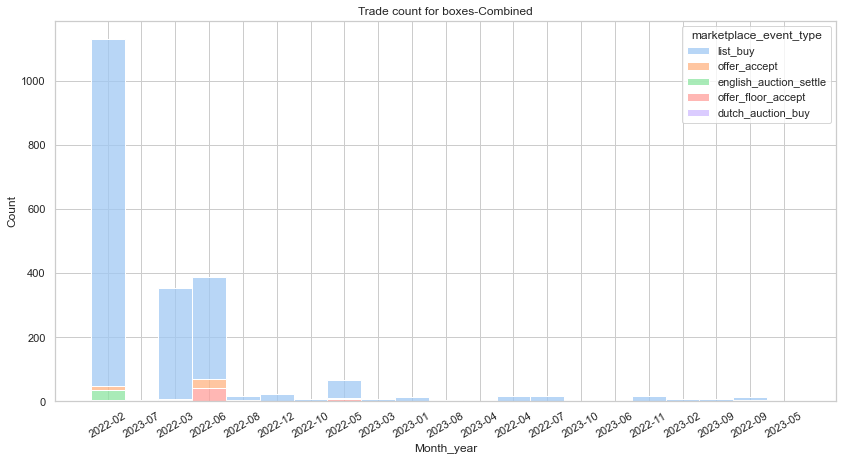

In [96]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
a = sns.histplot(data = box, x='Month_year',hue='marketplace_event_type', multiple="stack", binwidth= 1)
plt.title('Trade count for boxes-Combined')
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

[Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Trade count for boxes(2022)')]

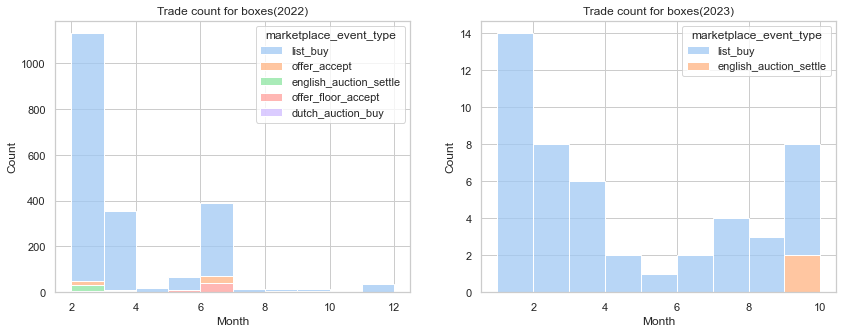

In [81]:
sns.set_theme(style="whitegrid", palette="pastel")
fig,axes = plt.subplots(1, 2, figsize = (14,5))
sns.histplot(ax = axes[1], data = box[(box['timestamp']>='2023-01-01')&(box['currency_id'] != 1429)], x='month',hue='marketplace_event_type', multiple="stack", binwidth= 1)
axes[1].set(xlabel = 'Month',title='Trade count for boxes(2023)')

sns.histplot(ax = axes[0], data = box[(box['timestamp']<'2023-01-01')&(box['currency_id'] != 1429)], x='month', hue='marketplace_event_type', multiple="stack", binwidth= 1)
axes[0].set(xlabel = 'Month',title='Trade count for boxes(2022)')

<class 'pandas.core.frame.DataFrame'>
Index: 57080 entries, 0 to 57113
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   from.address     45080 non-null  object             
 1   to.address       57080 non-null  object             
 2   timestamp        57080 non-null  datetime64[ns, UTC]
 3   id               57080 non-null  float64            
 4   token.tokenId    57080 non-null  int64              
 5   timediff_day     45080 non-null  timedelta64[s]     
 6   timediff_hour    45080 non-null  float64            
 7   timediff_second  45080 non-null  timedelta64[s]     
 8   timediff_hours   45080 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(2), timedelta64[s](2)
memory usage: 6.4+ MB


In [74]:
box['year'] = pd.Series([])

In [9]:

#X is a DataFrame
def get_year(x):
        if x < '2023-01-01':
            return 2022
        elif x >= '2023-01-01' and x < '2024-01-01':
            return 2023

In [144]:
box['timestamp'].apply(lambda x: get_year(x))

0       2022
1       2022
2       2022
3       2023
4       2022
        ... 
2092    2023
2093    2022
2094    2022
2095    2022
2096    2022
Name: timestamp, Length: 2097, dtype: int64

In [150]:
box1['year'] = box1['timestamp'].apply(lambda x: get_year(x))

In [151]:
#CREATE A NEW VARIABLE year
box['year'] = pd.Series([])
box['year'] = box['timestamp'].apply(lambda x: get_year(x))

In [213]:
group_box = box[box['currency_id']!=1429][['year','Week','marketplace_event_type','price']].groupby(by = ['year','Week', 'marketplace_event_type']).mean()

In [253]:
group_box['price']

year  Week  marketplace_event_type
2022  8     dutch_auction_buy         246.506551
            english_auction_settle    350.320000
            list_buy                  312.847352
            offer_accept              246.133400
      9     english_auction_settle    348.625000
                                         ...    
2023  37    english_auction_settle    105.500000
            list_buy                   78.000000
      38    list_buy                   78.000000
      41    list_buy                   88.000000
      52    list_buy                  309.000000
Name: price, Length: 95, dtype: float64

In [244]:
Ptrade_final.index

Index([   0,    1,    2,    3,    5,    6,    8,   10,   12,   15,
       ...
       6904, 6905, 6906, 6907, 6910, 6911, 6912, 6913, 6914, 6915],
      dtype='int64', length=5022)

John#Peter#Vicky


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 96 entries, (2022, 8, 'dutch_auction_buy') to (2023, 52, 'list_buy')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   96 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Box price history')]

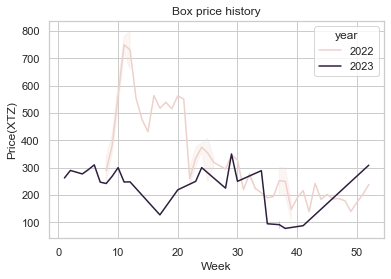

In [215]:
sns.set_theme(style="whitegrid", palette="pastel")
a = sns.lineplot(group_box, x='Week', y='price',hue='year')
a.set(ylabel='Price(XTZ)', title= 'Box price history')

In [10]:
Counter(Ptrade_final.currency_id)
#Only 1 and 4 are useful, XTZ and oxtz

Counter({1.0: 4874, 4.0: 148, 1429.0: 40, 176317.0: 2})

In [11]:
Ptrade_final[Ptrade_final['currency_id']==176317.0]

,id,price,timestamp,token_pk,recipient_address,creator_address,currency_id,marketplace_event_type,token.token_id,currency.current_exchange_rate,currency.decimals,ts_new,Week,month,token_id,Birthday,Rarity tier,Rarity score
4,50272422.0,39.9,2023-05-02T15:32:04+00:00,34437.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1TjNmNC7LDRGgJxKjhghsQ7Fz8rvH9av5Y,176317.0,list_buy,46,NaN,2.0,2023-05-02 15:32:04,18,5,46,02-May-2023,Silver,7580.36
5010,50356441.0,5.0,2023-05-10T09:16:37+00:00,585436.0,tz1MKfZ7QdHxwb7MCg1y3XkaYmsUh5N6j4Qb,tz1PqTsXdFeiqeYQj5UnWkBuJbGSKNAWniiP,176317.0,list_buy,8187,NaN,2.0,2023-05-10 09:16:37,19,5,8187,04-Jul-2022,Bronze,2725.71


In [ ]:
[i in [1,4] for i in Ptrade_final['currency_id']]

In [12]:
Ptrade_final['year'] = Ptrade_final['timestamp'].apply(lambda x: get_year(x))
Ptrade_final = Ptrade_final[[i in [1,4] for i in Ptrade_final['currency_id']]] ##Only choose transactions in XTZ and Oxtz

In [ ]:
Ptrade_final.info()

In [13]:
group_puppies = Ptrade_final[['year','Week','Rarity tier','price']].groupby(['year','Week','Rarity tier']).mean()

In [14]:
group_puppies.reset_index(inplace=True)

In [15]:
group_puppies.index

RangeIndex(start=0, stop=297, step=1)

[Text(0, 0.5, 'Price(0-7000 xtz)'),
 Text(0.5, 1.0, 'Price in All Rarity tiers 2022')]

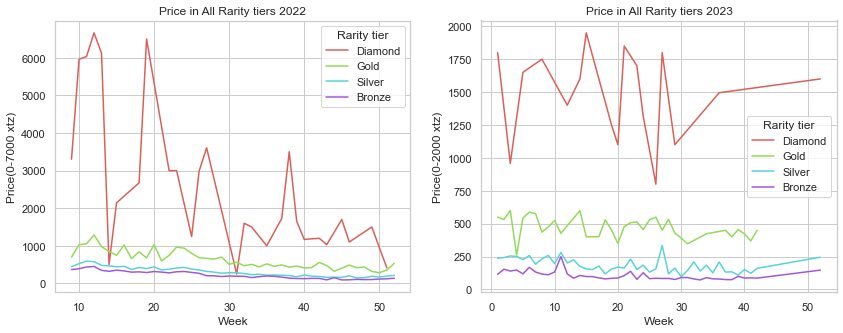

In [17]:
sns.set_theme(style="whitegrid", palette="pastel")
fig,axes = plt.subplots(1, 2, figsize = (14,5))
sns.lineplot(ax = axes[1], data = group_puppies[group_puppies['year']==2023], x='Week', y='price',hue='Rarity tier', hue_order= ['Diamond','Gold', 'Silver','Bronze'], palette= 'hls')
axes[1].set(ylabel= 'Price(0-2000 xtz)', title = 'Price in All Rarity tiers 2023')
sns.lineplot(ax = axes[0], data = group_puppies[group_puppies['year']==2022], x='Week', y='price',hue='Rarity tier', hue_order= ['Diamond','Gold', 'Silver','Bronze'], palette= 'hls')
axes[0].set(ylabel= 'Price(0-7000 xtz)', title = 'Price in All Rarity tiers 2022')



In [19]:
Ptrade_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022 entries, 0 to 6915
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5022 non-null   float64       
 1   price                           5022 non-null   float64       
 2   timestamp                       5022 non-null   object        
 3   token_pk                        5022 non-null   float64       
 4   recipient_address               5022 non-null   object        
 5   creator_address                 5022 non-null   object        
 6   currency_id                     5022 non-null   float64       
 7   marketplace_event_type          5022 non-null   object        
 8   token.token_id                  5022 non-null   int64         
 9   currency.current_exchange_rate  0 non-null      float64       
 10  currency.decimals               5022 non-null   float64       
 11  ts_new   

[Text(0.5, 1.0, 'Trade volume by event type 2022')]

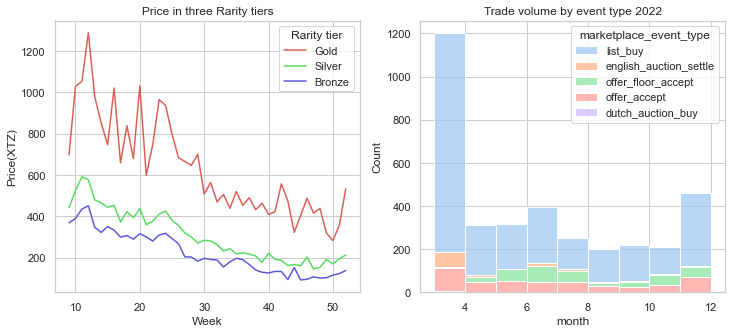

In [23]:
#To look into details, the price of Diamond doga too high to compress the lines of other doga.
fig1, axes = plt.subplots(1,2, figsize =(12,5))
sns.lineplot(ax=axes[0], data = group_puppies[group_puppies['year']==2022], x='Week', y='price', hue= 'Rarity tier', hue_order= ['Gold', 'Silver','Bronze'], palette= 'hls')
axes[0].set(ylabel= 'Price(XTZ)', title = 'Price in three Rarity tiers')
sns.histplot(ax = axes[1] ,data = Ptrade_final[Ptrade_final['year'] == 2022] ,x='month',hue='marketplace_event_type',multiple="stack", binwidth= 1)
axes[1].set(title='Trade volume by event type 2022')  


[Text(0.5, 1.0, 'Trade volume by event type 2023')]

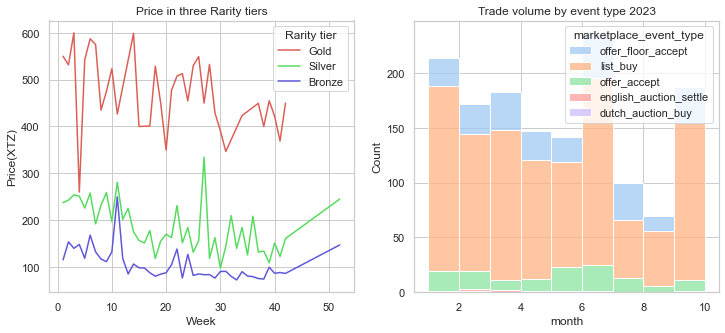

In [25]:
fig1, axes = plt.subplots(1,2, figsize =(12,5))
sns.lineplot(ax=axes[0], data = group_puppies[group_puppies['year']==2023], x='Week', y='price', hue= 'Rarity tier', hue_order= ['Gold', 'Silver','Bronze'], palette= 'hls')
axes[0].set(ylabel= 'Price(XTZ)', title = 'Price in three Rarity tiers')
sns.histplot(ax = axes[1] ,data = Ptrade_final[Ptrade_final['year'] == 2023] ,x='month',hue='marketplace_event_type',multiple="stack", binwidth= 1)
axes[1].set(title='Trade volume by event type 2023')  


[Text(0.5, 1.0, 'Trade volume by event type(limited week)')]

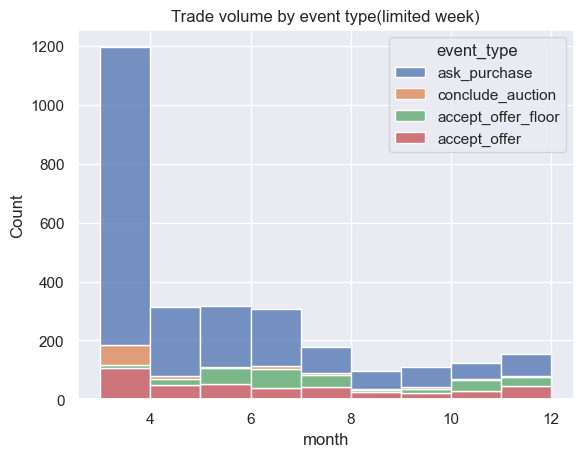

In [ ]:
a = sns.histplot(Ptrade_final,x='month',hue='event_type',multiple="stack", binwidth= 1)
a.set(title='Trade volume by event type(limited week)')

#Analysis of the trades of puppies

[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Puppies trades by weeks')]

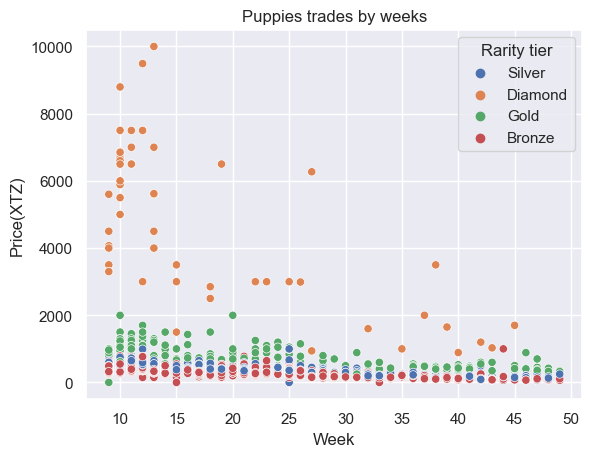

In [ ]:
a = sns.scatterplot(Ptrade_final, x='Week', y='price', hue='Rarity tier',)
a.set(ylabel='Price(XTZ)', title='Puppies trades by weeks')

[Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Puppies trade count')]

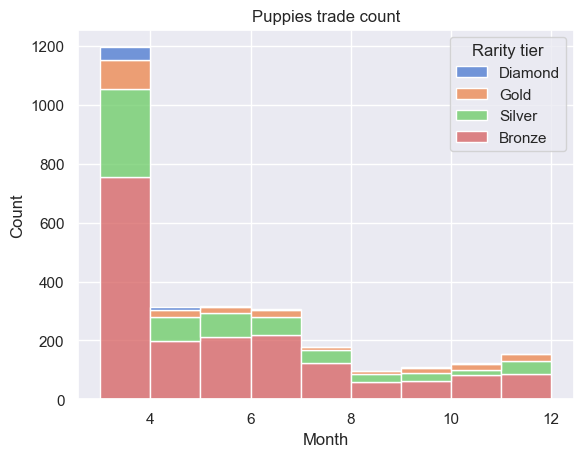

In [ ]:
a=sns.histplot(Ptrade_final, x='month', hue='Rarity tier', palette= 'muted', multiple="stack", binwidth= 1, hue_order= ['Diamond','Gold', 'Silver','Bronze'])
a.set(xlabel='Month', title='Puppies trade count')

In [4]:
group_puppies = Ptrade_final[['Week','Rarity tier','price']].groupby(['Week','Rarity tier']).mean()

In [5]:
Ptrade_final.columns

Index(['id', 'price', 'timestamp', 'token_pk', 'recipient_address',
       'creator_address', 'currency_id', 'marketplace_event_type',
       'token.token_id', 'currency.current_exchange_rate', 'currency.decimals',
       'ts_new', 'Week', 'month', 'token_id', 'Birthday', 'Rarity tier',
       'Rarity score'],
      dtype='object')

In [6]:
group_puppies.head()

price
Week Rarity tier             
1    Bronze        115.136000
     Diamond      1800.000000
     Gold          550.000000
     Silver        324.909091
2    Bronze        153.625313

[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Price in All Rarity tiers')]

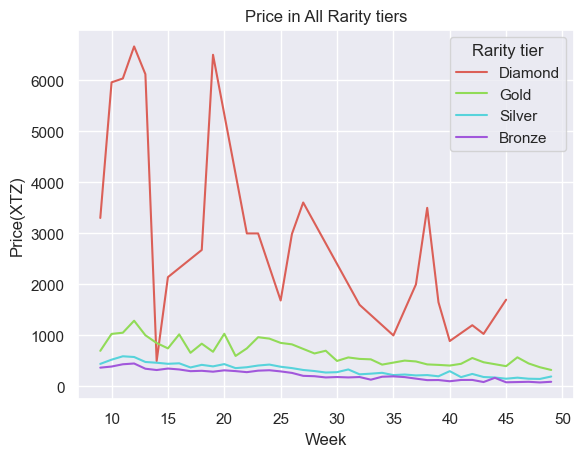

In [ ]:
a = sns.lineplot(group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Diamond','Gold', 'Silver','Bronze'], palette= 'hls')
a.set(ylabel= 'Price(XTZ)', title = 'Price in All Rarity tiers')


[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Price in three Rarity tiers')]

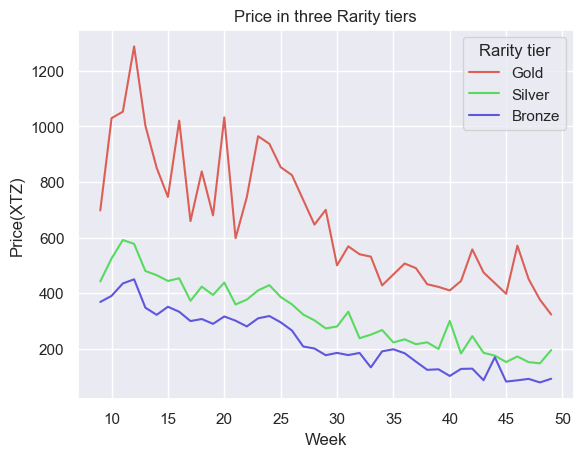

In [ ]:
a = sns.lineplot(group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Gold', 'Silver','Bronze'], palette= 'hls')
a.set(ylabel= 'Price(XTZ)', title = 'Price in three Rarity tiers')


<AxesSubplot:xlabel='month', ylabel='price'>

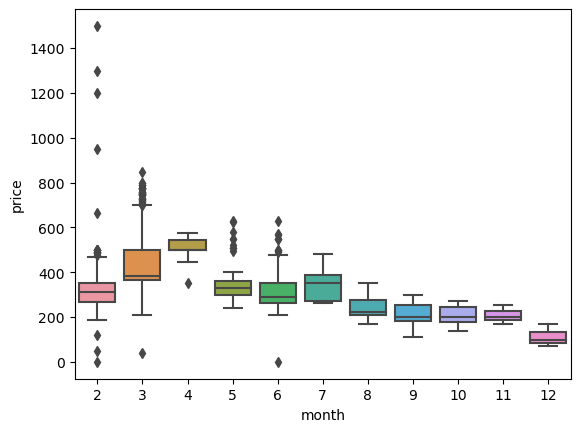

In [ ]:
sns.boxplot(box, x='month', y='price')

[Text(0.5, 1.0, 'Transaction of Bronze dogs')]

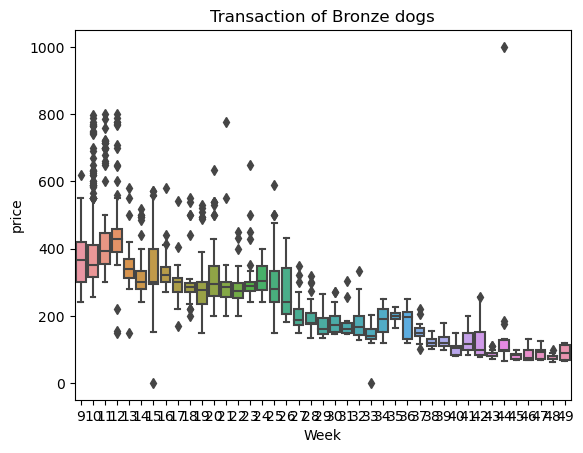

In [ ]:
a = sns.boxplot(Ptrade_final[Ptrade_final['Rarity tier']=='Bronze'], x='Week', y='price')
#sns.set(rc={'figure.figsize':(8,6)})
a.set(title='Transaction of Bronze dogs')

[Text(0.5, 1.0, 'Transaction of Gold dogs')]

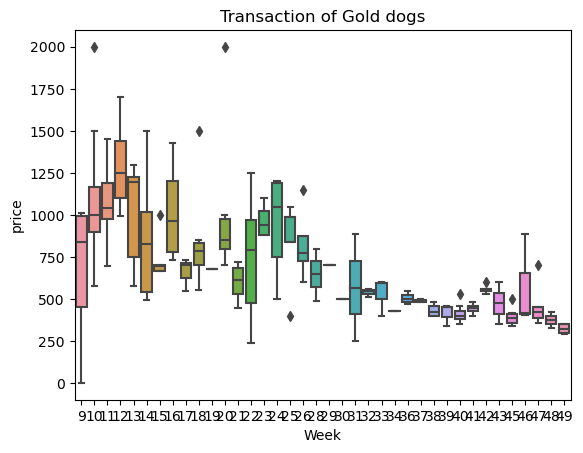

In [ ]:
a = sns.boxplot(Ptrade_final[Ptrade_final['Rarity tier']=='Gold'], x='Week', y='price')
a.set(title='Transaction of Gold dogs')

[(0.0, 500.0)]

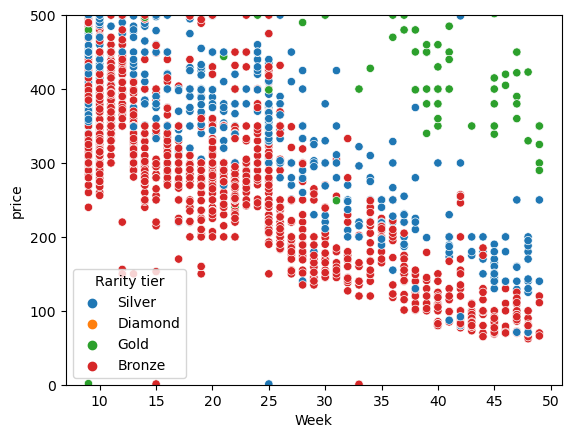

In [ ]:
a = sns.scatterplot(Ptrade_final, x='Week', y='price', hue='Rarity tier')
a.set(ylim= (0,500))

In [ ]:
Counter(Ptrade['Week']).most_common(5)

[(8, 922), (10, 582), (9, 554), (22, 230), (11, 204)]

In [ ]:
Ptrade_final.head()

,0,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,last_metadata_update,token_id,Birthday,Rarity tier,Rarity score
0,NaN,31553847.0,ask_purchase,250.0,2022-08-11T09:04:29+00:00,23684.0,tz2XYjjBvQmHNankGRSdNsKdFbQ1kEjQJrrb,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,48,2022-08-11 09:04:29,32,8,2022-07-06T17:32:14,48,2022-03-06,Silver,4751.24
1,NaN,31600098.0,ask_purchase,270.0,2022-08-12T16:06:44+00:00,23535.0,tz1RhD4eJNjD52VYfe94JNVhNT6yTXFZ1PLe,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,49,2022-08-12 16:06:44,32,8,2022-07-06T17:34:44,49,2022-03-06,Silver,6364.02
6,NaN,26417463.0,ask_purchase,1499.0,2022-04-15T04:47:29+00:00,10306.0,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-04-15 04:47:29,15,4,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
16,NaN,24805913.0,ask_purchase,6750.0,2022-03-13T08:33:24+00:00,18697.0,tz1Vw1tsHuRYaCuk341eUzPfK7oj6FFcs6c9,tz1e3JMZRrfofz6LZc4wydMTHSBiL8rvCEnd,42,2022-03-13 08:33:24,10,3,2022-07-06T17:24:14,42,2022-03-05,Diamond,8981.67
17,NaN,3143609.0,conclude_auction,970.0,2022-03-06T09:50:24+00:00,16036.0,tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX,tz2MuvEK35bkmNuZVovmB4LY5L3963SGfY8b,28,2022-03-06 09:50:24,9,3,2022-07-06T16:50:59,28,2022-03-04,Gold,8152.17


Stastical models and explaination

In [ ]:
#Conduct a simple linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
lm = LinearRegression().fit(Ptrade_final[['Week', 'Rarity score']],Ptrade_final['price'])

In [ ]:
print(f'The intercept is {round(lm.intercept_*100)/100}' )
print(f'The coefficients of week is {round(lm.coef_[0]*100)/100} and Rarity score is {round(lm.coef_[1]*100)/100} ')
print('the R square is {}'.format(lm.score(Ptrade_final[['Week', 'Rarity score']], Ptrade_final['price'] )))

The intercept is -382.09
The coefficients of week is -12.77 and Rarity score is 0.23 
the R square is 0.27716960503991717


In [ ]:
x= Ptrade_final[['Week', 'Rarity score']]
x=sm.add_constant(x) #Add constant variable

In [ ]:
y = Ptrade_final['price']

In [ ]:
model = sm.OLS(y, x)

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     535.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.93e-197
Time:                        10:37:05   Log-Likelihood:                -22122.
No. Observations:                2794   AIC:                         4.425e+04
Df Residuals:                    2791   BIC:                         4.427e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -382.0939     46.332     -8.247   

Unused code

In [ ]:
Ptrade.drop(columns=0, inplace=True)

In [ ]:
query = """query MyQuery {
  event(
    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_eq: "ask_purchase"}, token: {token_id: {_in: ["3","4"]}}}
  ) {
    id
    event_type
    price
    timestamp
    token_pk
    token {
      token_id
    }
    recipient_address
    creator_address
  }
}

"""
url = "https://data.objkt.com/v2/graphql"

In [ ]:
r = requests.post(url, json={'query': query})
print(r.status_code)
json_data = json.loads(r.text)
type(json_data)
df = pd.json_normalize(json_data, record_path=['data','event'])
df.head()

200


,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id
0,22437837,ask_purchase,666000000,2022-02-22T22:27:50+00:00,10306,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,3
1,22490512,ask_purchase,1200000000,2022-02-23T01:41:00+00:00,10691,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,4
2,26417463,ask_purchase,1499000000,2022-04-15T04:47:29+00:00,10306,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3


In [ ]:
for i in [2,3,4,5]:
    print(i in [2,3,4])

True
True
True
False


In [ ]:
#df.to_excel("df.xlsx", sheet_name='ask purchase')

In [ ]:
#df["timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+00:00").isoformat())[1]

'2022-02-23T01:41:00'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3 non-null      int64 
 1   event_type         3 non-null      object
 2   price              3 non-null      int64 
 3   timestamp          3 non-null      object
 4   token_pk           3 non-null      int64 
 5   recipient_address  3 non-null      object
 6   creator_address    3 non-null      object
 7   token.token_id     3 non-null      object
dtypes: int64(3), object(5)
memory usage: 320.0+ bytes


In [ ]:
query

'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_eq: "ask_purchase"}, token: {token_id: {_in: ["3","4"]}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'

In [ ]:
query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in puppies['token_id'][:5]) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
